In [2]:
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
pd.options.display.max_columns = None

In [4]:
df = pd.read_excel('EDERJAKIN_LA_Datos_2021.xlsm', sheet_name=None)

In [5]:
#for sheet_name in list(df.keys()):
 #  df[sheet_name].to_csv(sheet_name + 'Sheet.csv')

In [6]:
Usuarios = pd.read_csv('UsuariosSheet.csv')
Tutores_perfil = pd.read_csv('Tutores perfilSheet.csv')
Conocimientos = pd.read_csv('ConocimientosSheet.csv')
Cursos = pd.read_csv('CursosSheet.csv')
Programas = pd.read_csv('ProgramasSheet.csv')
Cursos_en_Programas = pd.read_csv('Cursos en ProgramasSheet.csv')
Itinearios = pd.read_csv('ItineariosSheet.csv')
Notas_Cursos = pd.read_csv('Notas_CursosSheet.csv')
Roles = pd.read_csv('RolesSheet.csv')
Plantas = pd.read_csv('PlantasSheet.csv')
Accesos = pd.read_csv('AccesosSheet.csv')
Acceso_1ero_ultimo = pd.read_csv('Acceso_1ero_ultimoSheet.csv')
Actividades = pd.read_csv('ActividadesSheet.csv')

In [7]:
Itinearios['tutor_empresa_id'].unique()

array([190,  50, 110,  41, 115, 205,  42, 266,  10, 206, 286,  88, 287,
        77,  49, 207,   0, 174,  82,  76, 292, 195, 285, 160, 162, 164,
       168, 167, 170, 172, 176, 178,  91,  89,  90, 289, 193, 290, 198,
       202, 250, 204, 203, 284, 283, 154, 294, 319, 324, 150, 326, 330],
      dtype=int64)

In [8]:
Itinearios['tutor_academico_id'].unique()

array([  0, 148], dtype=int64)

In [9]:
Usuarios

Unnamed: 0  user_id useranonimo_name  active_flag language  last_access  \
0             0        3      username_03            1       es          NaN   
1             1        4      username_04            1       es          NaN   
2             2        5      username_05            1       es          NaN   
3             3        6      username_06            1       es          NaN   
4             4        7      username_07            1       es          NaN   
..          ...      ...              ...          ...      ...          ...   
415         415      432     username_432            1       es          NaN   
416         416      433     username_433            1       es          NaN   
417         417      434     username_434            1       es          NaN   
418         418      435     username_435            1       es          NaN   
419         419      436     username_436            1       es          NaN   

     mdl_user_id  role_admin  role_manager  role_student  role_tutor  \
0           13.0           0             0             1           0   
1           14.0           0             0             1           0   
2           15.0           0             0             1           0   
3           17.0           0             0             1           0   
4           18.0           0             0             1           0   
..           ...         ...           ...           ...         ...   
415        457.0           0             0             1           0   
416        458.0           0             0             1           0   
417        459.0           0             0             1           0   
418        460.0           0             0             1           0   
419        461.0           0             1             1           1   

         planta_name  Unnamed: 11  
0        ABP Bergara          NaN  
1       Fagorederlan          NaN  
2       ABP Arrasate          NaN  
3       Fagorederlan          NaN  
4       ABP Arrasate          NaN  
..               ...          ...  
415  MT Aretxabaleta          NaN  
416  MT Aretxabaleta          NaN  
417  MT Aretxabaleta          NaN  
418  MT Aretxabaleta          NaN  
419      ABP Bergara          NaN  

[420 rows x 13 columns]

In [10]:
#Nombre de columnas
Usuarios.columns

Index(['Unnamed: 0', 'user_id', 'useranonimo_name', 'active_flag', 'language',
       'last_access', 'mdl_user_id', 'role_admin', 'role_manager',
       'role_student', 'role_tutor', 'planta_name', 'Unnamed: 11'],
      dtype='object')

In [11]:
#Numero de columnas/filas
Usuarios.shape

(420, 13)

In [12]:
Usuarios.info

<bound method DataFrame.info of      Unnamed: 0  user_id useranonimo_name  active_flag language  last_access  \
0             0        3      username_03            1       es          NaN   
1             1        4      username_04            1       es          NaN   
2             2        5      username_05            1       es          NaN   
3             3        6      username_06            1       es          NaN   
4             4        7      username_07            1       es          NaN   
..          ...      ...              ...          ...      ...          ...   
415         415      432     username_432            1       es          NaN   
416         416      433     username_433            1       es          NaN   
417         417      434     username_434            1       es          NaN   
418         418      435     username_435            1       es          NaN   
419         419      436     username_436            1       es          NaN   

     md

In [13]:
#Tipos de variables
Usuarios.dtypes

Unnamed: 0            int64
user_id               int64
useranonimo_name     object
active_flag           int64
language             object
last_access         float64
mdl_user_id         float64
role_admin            int64
role_manager          int64
role_student          int64
role_tutor            int64
planta_name          object
Unnamed: 11         float64
dtype: object

In [14]:
#Duplicados
Usuarios.duplicated().sum() # busca duplicados de fila completa

0

In [15]:
#NA'S
Usuarios.isna()
#Eliminamos last_acceses por %100 de NA'S 
Usuarios.isna().sum()


Unnamed: 0            0
user_id               0
useranonimo_name      0
active_flag           0
language              0
last_access         420
mdl_user_id          15
role_admin            0
role_manager          0
role_student          0
role_tutor            0
planta_name           0
Unnamed: 11         420
dtype: int64

In [16]:
#Se quitan o no 15 mdl_user_id en caso de que no necesitemos la variable
Usuarios=Usuarios.dropna(subset = ['mdl_user_id'])

In [17]:
Usuarios=Usuarios.drop(['Unnamed: 0'], axis=1)

In [18]:
Usuarios

user_id useranonimo_name  active_flag language  last_access  mdl_user_id  \
0          3      username_03            1       es          NaN         13.0   
1          4      username_04            1       es          NaN         14.0   
2          5      username_05            1       es          NaN         15.0   
3          6      username_06            1       es          NaN         17.0   
4          7      username_07            1       es          NaN         18.0   
..       ...              ...          ...      ...          ...          ...   
415      432     username_432            1       es          NaN        457.0   
416      433     username_433            1       es          NaN        458.0   
417      434     username_434            1       es          NaN        459.0   
418      435     username_435            1       es          NaN        460.0   
419      436     username_436            1       es          NaN        461.0   

     role_admin  role_manager  role_student  role_tutor      planta_name  \
0             0             0             1           0      ABP Bergara   
1             0             0             1           0     Fagorederlan   
2             0             0             1           0     ABP Arrasate   
3             0             0             1           0     Fagorederlan   
4             0             0             1           0     ABP Arrasate   
..          ...           ...           ...         ...              ...   
415           0             0             1           0  MT Aretxabaleta   
416           0             0             1           0  MT Aretxabaleta   
417           0             0             1           0  MT Aretxabaleta   
418           0             0             1           0  MT Aretxabaleta   
419           0             1             1           1      ABP Bergara   

     Unnamed: 11  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
415          NaN  
416          NaN  
417          NaN  
418          NaN  
419          NaN  

[405 rows x 12 columns]

In [19]:
Tutores_perfil

Unnamed: 0  perfil_id  user_id        perfil_name
0             0          3       10  Gestor de empresa
1             1          3       41  Gestor de empresa
2             2          3       42  Gestor de empresa
3             3          3      110  Gestor de empresa
4             4          3      115  Gestor de empresa
..          ...        ...      ...                ...
183         183          0      358                NaN
184         184          0      369                NaN
185         185          0      379                NaN
186         186          0      415                NaN
187         187          0      423                NaN

[188 rows x 4 columns]

In [20]:
Tutores_perfil.columns

Index(['Unnamed: 0', 'perfil_id', 'user_id', 'perfil_name'], dtype='object')

In [21]:
Tutores_perfil=Tutores_perfil.drop(['Unnamed: 0'], axis=1)

In [22]:
#Tipos de variables
Tutores_perfil.dtypes

perfil_id       int64
user_id         int64
perfil_name    object
dtype: object

In [23]:
#Duplicados
Tutores_perfil.duplicated().sum() # busca duplicados de fila completa

0

In [24]:
#NA'S
Tutores_perfil.isna()
#Eliminamos last_acceses por %100 de NA'S 
Tutores_perfil.isna().sum()

perfil_id       0
user_id         0
perfil_name    70
dtype: int64

In [25]:
Tutores_perfil.shape

(188, 3)

In [26]:
Tutores_perfil = Tutores_perfil.fillna("Tutores basicos")

In [27]:
Tutores_perfil

perfil_id  user_id        perfil_name
0            3       10  Gestor de empresa
1            3       41  Gestor de empresa
2            3       42  Gestor de empresa
3            3      110  Gestor de empresa
4            3      115  Gestor de empresa
..         ...      ...                ...
183          0      358    Tutores basicos
184          0      369    Tutores basicos
185          0      379    Tutores basicos
186          0      415    Tutores basicos
187          0      423    Tutores basicos

[188 rows x 3 columns]

In [28]:
Conocimientos

Unnamed: 0  conocimiento_id              conocimiento_name    color  \
0             0              161                           35UP      NaN   
1             1               21                            ABP  #ff4c05   
2             2              157       ACABADO - Control Visual      NaN   
3             3               42  ACABADO - Tratamiento Térmico      NaN   
4             4               90    ACABADO_Tratamiento Térmico      NaN   
..          ...              ...                            ...      ...   
150         150                8                  TECNICOS_DUAL      NaN   
151         151              104              U_ACOGIDA GENERAL      NaN   
152         152              106                   U_MECANIZADO      NaN   
153         153              105                   U_SOCIETARIO      NaN   
154         154              159                            UKL      NaN   

     created_by                        description  categoria_conocimiento_id  \
0           134                                NaN                        158   
1           135                                NaN                          0   
2           134                                NaN                         79   
3           135                                NaN                         42   
4           145                                NaN                         79   
..          ...                                ...                        ...   
150         132                                NaN                          5   
151         190                                NaN                         11   
152         190    (DESCRIPCION DEL CONOCIMIENTO?)                          7   
153         190  U: (DESCRIPCION DEL CONOCIMIENTO)                         17   
154         134                                NaN                        158   

    referencia          categoria_conocimiento_name  
0          NaN  Técnico Tecnologico ABP Referencias  
1          NaN                                  NaN  
2          NaN            TÉCNICOS/TECNOLÓGICOS ABP  
3          NaN        ACABADO - Tratamiento Térmico  
4          NaN            TÉCNICOS/TECNOLÓGICOS ABP  
..         ...                                  ...  
150        NaN                                 DUAL  
151        NaN                              ACOGIDA  
152        NaN                             TÉCNICOS  
153        NaN                          SOCIETARIOS  
154        NaN  Técnico Tecnologico ABP Referencias  

[155 rows x 9 columns]

In [29]:
#Nombre de columnas
Conocimientos.columns

Index(['Unnamed: 0', 'conocimiento_id', 'conocimiento_name', 'color',
       'created_by', 'description', 'categoria_conocimiento_id', 'referencia',
       'categoria_conocimiento_name'],
      dtype='object')

In [30]:
Conocimientos=Conocimientos.drop(['Unnamed: 0'], axis=1)
Conocimientos=Conocimientos.drop(['color'], axis=1)


In [31]:
#Tipos de variables
Conocimientos.dtypes

conocimiento_id                 int64
conocimiento_name              object
created_by                      int64
description                    object
categoria_conocimiento_id       int64
referencia                     object
categoria_conocimiento_name    object
dtype: object

In [32]:
#Duplicados
Conocimientos.duplicated().sum() # busca duplicados de fila completa

0

In [33]:
#NA'S
Conocimientos.isna()
#Eliminamos last_acceses por %100 de NA'S 
Conocimientos.isna().sum()

conocimiento_id                  0
conocimiento_name                0
created_by                       0
description                    138
categoria_conocimiento_id        0
referencia                     122
categoria_conocimiento_name     22
dtype: int64

In [34]:
Conocimientos.shape

(155, 7)

In [35]:
Conocimientos=Conocimientos.drop(['description'], axis=1)
Conocimientos=Conocimientos.drop(['referencia'], axis=1)


In [36]:
Conocimientos = Conocimientos.fillna("Sin asignar")


In [37]:
Cursos


Unnamed: 0  course_id                             course_name  category  \
0             0          1                  EDERJakin FagorEDERLAN         0   
1             1          2           ITINERARIO GRADO DUAL 2018/19         3   
2             2          6           ITINERARIO CICLO DUAL 2018/19         3   
3             3          9        TEC_01 - PRODUCTOS FAGOR EDERLAN         3   
4             4         10           TEC_02 - PROCESOS PRODUCTIVOS         3   
..          ...        ...                                     ...       ...   
134         134        303  CONTROL VISUAL MEC - MLA IKUS KONTROLA        27   
135         135        304   CONTROL VISUAL MEC - BR IKUS KONTROLA        27   
136         136        305                CONTROL VISUAL MEC - UKL        27   
137         137        306                              CURSO UXUE        27   
138         138        307            FUSIOA ABP - FUSIO DORREA N2        27   

     hours      course_shortname  sortorder  \
0        0             EDERJAKIN          1   
1        0  ITI_GRADO_DUAL_18/19      40016   
2        0  ITI_CICLO_DUAL_18/19      40014   
3        4                TEC_01      40022   
4       20                TEC_02      40024   
..     ...                   ...        ...   
134      0      TEC_CVMEC_02_MLA     110003   
135      0       TEC_CVMEC_02_BR     110002   
136      0      TEC_CVMEC_01_UKL     110001   
137      0          TEC_ABP_UXUE          0   
138     40              _ALDATU_          0   

                                               summary  
0                                                  NaN  
1    Itinerario de Aprendizaje del GRADO DUAL en Fa...  
2    Itinerario de Aprendizaje del CICLO DUAL en Fa...  
3    Conocer los PRODUCTOS fabricados de Fagor EDERLAN  
4    Conocer los PROCESOS PRODUCTIVOS de Fagor EDERLAN  
..                                                 ...  
134                                                NaN  
135                                                NaN  
136                                                NaN  
137                                                NaN  
138                                                NaN  

[139 rows x 8 columns]

In [38]:
#Nombre de columnas
Cursos.columns

Index(['Unnamed: 0', 'course_id', 'course_name', 'category', 'hours',
       'course_shortname', 'sortorder', 'summary'],
      dtype='object')

In [39]:
Cursos=Cursos.drop("course_shortname",axis=1)
Cursos=Cursos.drop("Unnamed: 0",axis=1)

In [40]:
#Tipos de variables
Cursos.dtypes

course_id       int64
course_name    object
category        int64
hours           int64
sortorder       int64
summary        object
dtype: object

In [41]:
#Duplicados
Cursos.duplicated().sum() # busca duplicados de fila completa

0

In [42]:
Cursos.shape

(139, 6)

In [43]:
#NA'S
Cursos.isna()
#Eliminamos last_acceses por %100 de NA'S 
Cursos.isna().sum()

course_id       0
course_name     0
category        0
hours           0
sortorder       0
summary        95
dtype: int64

In [44]:
Cursos = Cursos.fillna("No especificado")

In [45]:
Cursos = Cursos.rename(columns={'category':'category_curso_id'})

In [46]:
Cursos

course_id                             course_name  category_curso_id  \
0            1                  EDERJakin FagorEDERLAN                  0   
1            2           ITINERARIO GRADO DUAL 2018/19                  3   
2            6           ITINERARIO CICLO DUAL 2018/19                  3   
3            9        TEC_01 - PRODUCTOS FAGOR EDERLAN                  3   
4           10           TEC_02 - PROCESOS PRODUCTIVOS                  3   
..         ...                                     ...                ...   
134        303  CONTROL VISUAL MEC - MLA IKUS KONTROLA                 27   
135        304   CONTROL VISUAL MEC - BR IKUS KONTROLA                 27   
136        305                CONTROL VISUAL MEC - UKL                 27   
137        306                              CURSO UXUE                 27   
138        307            FUSIOA ABP - FUSIO DORREA N2                 27   

     hours  sortorder                                            summary  
0        0          1                                    No especificado  
1        0      40016  Itinerario de Aprendizaje del GRADO DUAL en Fa...  
2        0      40014  Itinerario de Aprendizaje del CICLO DUAL en Fa...  
3        4      40022  Conocer los PRODUCTOS fabricados de Fagor EDERLAN  
4       20      40024  Conocer los PROCESOS PRODUCTIVOS de Fagor EDERLAN  
..     ...        ...                                                ...  
134      0     110003                                    No especificado  
135      0     110002                                    No especificado  
136      0     110001                                    No especificado  
137      0          0                                    No especificado  
138     40          0                                    No especificado  

[139 rows x 6 columns]

In [47]:
Programas

Unnamed: 0  program_id                       program_name  \
0             0          60           ITI CICLO DUAL 2019-2020   
1             1          61                    Programa PILOTO   
2             2          62  Maquinista Mecanizado ABP Bergara   
3             3          63                             nvnvbn   
4             4          64           ITI GRADO DUAL 2019-2020   
..          ...         ...                                ...   
105         105         184       Maquinista Mecanizados LPPFe   
106         106         185           Operario de Macheria LPC   
107         107         186                        PERTSONALAK   
108         108         187               Control Visual Bruto   
109         109         188             Control Visual Mec ABP   

    program_category_id  
0                  DUAL  
1               TÉCNICO  
2               TÉCNICO  
3                  DUAL  
4                  DUAL  
..                  ...  
105        ESPECIALISTA  
106    SOPORTE&OPERARIO  
107             GESTIÓN  
108    SOPORTE&OPERARIO  
109    SOPORTE&OPERARIO  

[110 rows x 4 columns]

In [48]:
#Nombre de columnas
Programas.columns

Index(['Unnamed: 0', 'program_id', 'program_name', 'program_category_id'], dtype='object')

In [49]:
#Numero de columnas/filas
Programas.shape

(110, 4)

In [50]:
Programas.info

<bound method DataFrame.info of      Unnamed: 0  program_id                       program_name  \
0             0          60           ITI CICLO DUAL 2019-2020   
1             1          61                    Programa PILOTO   
2             2          62  Maquinista Mecanizado ABP Bergara   
3             3          63                             nvnvbn   
4             4          64           ITI GRADO DUAL 2019-2020   
..          ...         ...                                ...   
105         105         184       Maquinista Mecanizados LPPFe   
106         106         185           Operario de Macheria LPC   
107         107         186                        PERTSONALAK   
108         108         187               Control Visual Bruto   
109         109         188             Control Visual Mec ABP   

    program_category_id  
0                  DUAL  
1               TÉCNICO  
2               TÉCNICO  
3                  DUAL  
4                  DUAL  
..                 

In [51]:
#Tipos de variables
Programas.dtypes

Unnamed: 0              int64
program_id              int64
program_name           object
program_category_id    object
dtype: object

In [52]:
#Duplicados
Programas.duplicated().sum() # busca duplicados de fila completa

0

In [53]:
#NA'S
Programas.isna()
Programas.isna().sum()

Unnamed: 0             0
program_id             0
program_name           0
program_category_id    1
dtype: int64

In [54]:
#Eliminamos la fila que contiene NA en program_category_id.
Programas=Programas.dropna(axis = 0, how = 'any') 
Programas.isna().sum()

Unnamed: 0             0
program_id             0
program_name           0
program_category_id    0
dtype: int64

In [55]:
#Eliminamos la columna 'Unnamed: 0' ya que no aporta valor.
Programas=Programas.drop(['Unnamed: 0'], axis=1)

In [56]:
Programas

program_id                       program_name program_category_id
0            60           ITI CICLO DUAL 2019-2020                DUAL
1            61                    Programa PILOTO             TÉCNICO
2            62  Maquinista Mecanizado ABP Bergara             TÉCNICO
3            63                             nvnvbn                DUAL
4            64           ITI GRADO DUAL 2019-2020                DUAL
..          ...                                ...                 ...
105         184       Maquinista Mecanizados LPPFe        ESPECIALISTA
106         185           Operario de Macheria LPC    SOPORTE&OPERARIO
107         186                        PERTSONALAK             GESTIÓN
108         187               Control Visual Bruto    SOPORTE&OPERARIO
109         188             Control Visual Mec ABP    SOPORTE&OPERARIO

[109 rows x 3 columns]

In [57]:
Cursos_en_Programas

Unnamed: 0  program_course_online_id  course_moodle_id  conocimiento_id  \
0             0                      5717                72               24   
1             1                      5718                70               20   
2             2                      5719               297              157   
3             3                      5723               298              165   
4             4                      5724               299               40   
..          ...                       ...               ...              ...   
248         248                      5640                72               24   
249         249                      5641                74               24   
250         250                      5642                69               20   
251         251                      5644                70               20   
252         252                      5652               193               90   

     num_periodo  program_id  \
0              1         187   
1              1         187   
2              1         187   
3              0         188   
4              0         188   
..           ...         ...   
248            1          66   
249            1          66   
250            1          66   
251            1          66   
252            2          66   

                                    course_moodle_id.1  \
0                         INTRODUCCIÓN EN PRL Y MA ABP   
1                                     PLAN ACOGIDA ABP   
2    CONTROL VISUAL GENÉRICO - LANDUGABEA IKUS KONT...   
3        CONTROL VISUAL MEC.  GENÉRICO - IKUS KONTROLA   
4               CONTROL VISUAL MEC - G2X IKUS KONTROLA   
..                                                 ...   
248                       INTRODUCCIÓN EN PRL Y MA ABP   
249                 EVALUACIÓN RIESGOS DEL PUESTO - TT   
250                               PLAN ACOGIDA GENERAL   
251                                   PLAN ACOGIDA ABP   
252                       TRATAMIENTO TÉRMICO ABP B_N3   

                 conocimiento_name                     program_name  
0    ACOGIDA PRL Y MEDIO AMBIENTE              Control Visual Bruto  
1                  ACOGIDA GENERAL             Control Visual Bruto  
2         ACABADO - Control Visual             Control Visual Bruto  
3                       MECANIZADO           Control Visual Mec ABP  
4                 MECANIZADO - G2X           Control Visual Mec ABP  
..                             ...                              ...  
248  ACOGIDA PRL Y MEDIO AMBIENTE   Tratamiento Térmico ABP Bergara  
249  ACOGIDA PRL Y MEDIO AMBIENTE   Tratamiento Térmico ABP Bergara  
250                ACOGIDA GENERAL  Tratamiento Térmico ABP Bergara  
251                ACOGIDA GENERAL  Tratamiento Térmico ABP Bergara  
252    ACABADO_Tratamiento Térmico  Tratamiento Térmico ABP Bergara  

[253 rows x 9 columns]

In [58]:
#Nombre de columnas
Cursos_en_Programas.columns

Index(['Unnamed: 0', 'program_course_online_id', 'course_moodle_id',
       'conocimiento_id', 'num_periodo', 'program_id', 'course_moodle_id.1',
       'conocimiento_name', 'program_name'],
      dtype='object')

In [59]:
#Numero de columnas/filas
Cursos_en_Programas.shape

(253, 9)

In [60]:
Cursos_en_Programas.info

<bound method DataFrame.info of      Unnamed: 0  program_course_online_id  course_moodle_id  conocimiento_id  \
0             0                      5717                72               24   
1             1                      5718                70               20   
2             2                      5719               297              157   
3             3                      5723               298              165   
4             4                      5724               299               40   
..          ...                       ...               ...              ...   
248         248                      5640                72               24   
249         249                      5641                74               24   
250         250                      5642                69               20   
251         251                      5644                70               20   
252         252                      5652               193               90   

     nu

In [61]:
Cursos_en_Programas.dtypes

Unnamed: 0                   int64
program_course_online_id     int64
course_moodle_id             int64
conocimiento_id              int64
num_periodo                  int64
program_id                   int64
course_moodle_id.1          object
conocimiento_name           object
program_name                object
dtype: object

In [62]:
#Duplicados
Cursos_en_Programas.duplicated().sum() # busca duplicados de fila completa

0

In [63]:
#NA'S
Cursos_en_Programas.isna()
Cursos_en_Programas.isna().sum()

Unnamed: 0                  0
program_course_online_id    0
course_moodle_id            0
conocimiento_id             0
num_periodo                 0
program_id                  0
course_moodle_id.1          0
conocimiento_name           0
program_name                0
dtype: int64

In [64]:
#Eliminamos la columna 'Unnamed: 0' ya que no aporta valor.
Cursos_en_Programas=Cursos_en_Programas.drop(['Unnamed: 0'], axis=1)

In [65]:
Cursos_en_Programas

program_course_online_id  course_moodle_id  conocimiento_id  num_periodo  \
0                        5717                72               24            1   
1                        5718                70               20            1   
2                        5719               297              157            1   
3                        5723               298              165            0   
4                        5724               299               40            0   
..                        ...               ...              ...          ...   
248                      5640                72               24            1   
249                      5641                74               24            1   
250                      5642                69               20            1   
251                      5644                70               20            1   
252                      5652               193               90            2   

     program_id                                 course_moodle_id.1  \
0           187                       INTRODUCCIÓN EN PRL Y MA ABP   
1           187                                   PLAN ACOGIDA ABP   
2           187  CONTROL VISUAL GENÉRICO - LANDUGABEA IKUS KONT...   
3           188      CONTROL VISUAL MEC.  GENÉRICO - IKUS KONTROLA   
4           188             CONTROL VISUAL MEC - G2X IKUS KONTROLA   
..          ...                                                ...   
248          66                       INTRODUCCIÓN EN PRL Y MA ABP   
249          66                 EVALUACIÓN RIESGOS DEL PUESTO - TT   
250          66                               PLAN ACOGIDA GENERAL   
251          66                                   PLAN ACOGIDA ABP   
252          66                       TRATAMIENTO TÉRMICO ABP B_N3   

                 conocimiento_name                     program_name  
0    ACOGIDA PRL Y MEDIO AMBIENTE              Control Visual Bruto  
1                  ACOGIDA GENERAL             Control Visual Bruto  
2         ACABADO - Control Visual             Control Visual Bruto  
3                       MECANIZADO           Control Visual Mec ABP  
4                 MECANIZADO - G2X           Control Visual Mec ABP  
..                             ...                              ...  
248  ACOGIDA PRL Y MEDIO AMBIENTE   Tratamiento Térmico ABP Bergara  
249  ACOGIDA PRL Y MEDIO AMBIENTE   Tratamiento Térmico ABP Bergara  
250                ACOGIDA GENERAL  Tratamiento Térmico ABP Bergara  
251                ACOGIDA GENERAL  Tratamiento Térmico ABP Bergara  
252    ACABADO_Tratamiento Térmico  Tratamiento Térmico ABP Bergara  

[253 rows x 8 columns]

In [66]:
Itinearios

Unnamed: 0  active_flag  category_id                date_enroll  \
0             0            0            8  2020-05-04T00:00:00+01:00   
1             1            1            2  2021-07-22T00:00:00+01:00   
2             2            1            8  2021-09-08T00:00:00+01:00   
3             3            0            2  2020-06-18T00:00:00+01:00   
4             4            0            2  2020-09-24T00:00:00+01:00   
..          ...          ...          ...                        ...   
462         462            1            5  2021-10-25T00:00:00+01:00   
463         463            1            5  2021-10-25T00:00:00+01:00   
464         464            1            5  2021-10-25T00:00:00+01:00   
465         465            1            8  2021-10-28T00:00:00+01:00   
466         466            1            8  2021-10-28T00:00:00+01:00   

                    enroll_end  program_id remarks  tutor_academico_id  \
0    2023-04-01T23:59:00+01:00          66     NaN                   0   
1                          NaN         145     NaN                   0   
2                          NaN         146     NaN                   0   
3                          NaN          64     NaN                 148   
4    2021-06-30T23:59:00+01:00         135     NaN                 148   
..                         ...         ...     ...                 ...   
462                        NaN         163     NaN                   0   
463                        NaN         163     NaN                   0   
464                        NaN         163     NaN                   0   
465                        NaN          66     NaN                   0   
466                        NaN         188     NaN                   0   

     tutor_empresa_id  user_id     category_name  \
0                 190        3  SOPORTE&OPERARIO   
1                  50        3              DUAL   
2                 110        3  SOPORTE&OPERARIO   
3                  41        4              DUAL   
4                  41        4              DUAL   
..                ...      ...               ...   
462               286      433      ESPECIALISTA   
463               287      434      ESPECIALISTA   
464               285      435      ESPECIALISTA   
465               190      436  SOPORTE&OPERARIO   
466               190      436  SOPORTE&OPERARIO   

                              program_name  
0          Tratamiento Térmico ABP Bergara  
1                               pruebas_01  
2               Operario Control Final CBI  
3                 ITI GRADO DUAL 2019-2020  
4                 ITI GRADO DUAL 2020-2021  
..                                     ...  
462  Maquinista Mecanizados Autogestión MT  
463  Maquinista Mecanizados Autogestión MT  
464  Maquinista Mecanizados Autogestión MT  
465        Tratamiento Térmico ABP Bergara  
466                 Control Visual Mec ABP  

[467 rows x 12 columns]

In [67]:
#Nombre de columnas
Itinearios.columns

Index(['Unnamed: 0', 'active_flag', 'category_id', 'date_enroll', 'enroll_end',
       'program_id', 'remarks', 'tutor_academico_id', 'tutor_empresa_id',
       'user_id', 'category_name', 'program_name'],
      dtype='object')

In [68]:
#Numero de columnas/filas
Itinearios.shape

(467, 12)

In [69]:
Itinearios.info

<bound method DataFrame.info of      Unnamed: 0  active_flag  category_id                date_enroll  \
0             0            0            8  2020-05-04T00:00:00+01:00   
1             1            1            2  2021-07-22T00:00:00+01:00   
2             2            1            8  2021-09-08T00:00:00+01:00   
3             3            0            2  2020-06-18T00:00:00+01:00   
4             4            0            2  2020-09-24T00:00:00+01:00   
..          ...          ...          ...                        ...   
462         462            1            5  2021-10-25T00:00:00+01:00   
463         463            1            5  2021-10-25T00:00:00+01:00   
464         464            1            5  2021-10-25T00:00:00+01:00   
465         465            1            8  2021-10-28T00:00:00+01:00   
466         466            1            8  2021-10-28T00:00:00+01:00   

                    enroll_end  program_id remarks  tutor_academico_id  \
0    2023-04-01T23:59:00+01:0

In [70]:
#Tipos de variables
Itinearios.dtypes

Unnamed: 0             int64
active_flag            int64
category_id            int64
date_enroll           object
enroll_end            object
program_id             int64
remarks               object
tutor_academico_id     int64
tutor_empresa_id       int64
user_id                int64
category_name         object
program_name          object
dtype: object

In [71]:
#Corregimos fecha y hora de date_enroll y enroll_end
Itinearios['date_enroll']= pd.to_datetime(Itinearios['date_enroll'],utc=True)
Itinearios['enroll_end']= pd.to_datetime(Itinearios['enroll_end'],utc=True)
Itinearios

Unnamed: 0  active_flag  category_id               date_enroll  \
0             0            0            8 2020-05-03 23:00:00+00:00   
1             1            1            2 2021-07-21 23:00:00+00:00   
2             2            1            8 2021-09-07 23:00:00+00:00   
3             3            0            2 2020-06-17 23:00:00+00:00   
4             4            0            2 2020-09-23 23:00:00+00:00   
..          ...          ...          ...                       ...   
462         462            1            5 2021-10-24 23:00:00+00:00   
463         463            1            5 2021-10-24 23:00:00+00:00   
464         464            1            5 2021-10-24 23:00:00+00:00   
465         465            1            8 2021-10-27 23:00:00+00:00   
466         466            1            8 2021-10-27 23:00:00+00:00   

                   enroll_end  program_id remarks  tutor_academico_id  \
0   2023-04-01 22:59:00+00:00          66     NaN                   0   
1                         NaT         145     NaN                   0   
2                         NaT         146     NaN                   0   
3                         NaT          64     NaN                 148   
4   2021-06-30 22:59:00+00:00         135     NaN                 148   
..                        ...         ...     ...                 ...   
462                       NaT         163     NaN                   0   
463                       NaT         163     NaN                   0   
464                       NaT         163     NaN                   0   
465                       NaT          66     NaN                   0   
466                       NaT         188     NaN                   0   

     tutor_empresa_id  user_id     category_name  \
0                 190        3  SOPORTE&OPERARIO   
1                  50        3              DUAL   
2                 110        3  SOPORTE&OPERARIO   
3                  41        4              DUAL   
4                  41        4              DUAL   
..                ...      ...               ...   
462               286      433      ESPECIALISTA   
463               287      434      ESPECIALISTA   
464               285      435      ESPECIALISTA   
465               190      436  SOPORTE&OPERARIO   
466               190      436  SOPORTE&OPERARIO   

                              program_name  
0          Tratamiento Térmico ABP Bergara  
1                               pruebas_01  
2               Operario Control Final CBI  
3                 ITI GRADO DUAL 2019-2020  
4                 ITI GRADO DUAL 2020-2021  
..                                     ...  
462  Maquinista Mecanizados Autogestión MT  
463  Maquinista Mecanizados Autogestión MT  
464  Maquinista Mecanizados Autogestión MT  
465        Tratamiento Térmico ABP Bergara  
466                 Control Visual Mec ABP  

[467 rows x 12 columns]

In [72]:
#Tipos de variables corregido fecha y hora
Itinearios.dtypes

Unnamed: 0                          int64
active_flag                         int64
category_id                         int64
date_enroll           datetime64[ns, UTC]
enroll_end            datetime64[ns, UTC]
program_id                          int64
remarks                            object
tutor_academico_id                  int64
tutor_empresa_id                    int64
user_id                             int64
category_name                      object
program_name                       object
dtype: object

In [73]:
#Duplicados
Itinearios.duplicated().sum() # busca duplicados de fila completa

0

In [74]:
#NA'S
Itinearios.isna()
Itinearios.isna().sum()

Unnamed: 0              0
active_flag             0
category_id             0
date_enroll             1
enroll_end            297
program_id              0
remarks               464
tutor_academico_id      0
tutor_empresa_id        0
user_id                 0
category_name           0
program_name            0
dtype: int64

In [75]:
#Eliminamos la columna 'Unnamed: 0' ya que no aporta valor.
#Eliminamos la columna 'remarcks' ya que casi tiene un 100% de NA
Itinearios=Itinearios.drop(['Unnamed: 0'], axis=1)
Itinearios=Itinearios.drop(['remarks'], axis=1)

In [76]:
Itinearios['date_enroll']=Itinearios['date_enroll'].dt.tz_localize(None)

In [77]:
Itinearios

active_flag  category_id         date_enroll                enroll_end  \
0              0            8 2020-05-03 23:00:00 2023-04-01 22:59:00+00:00   
1              1            2 2021-07-21 23:00:00                       NaT   
2              1            8 2021-09-07 23:00:00                       NaT   
3              0            2 2020-06-17 23:00:00                       NaT   
4              0            2 2020-09-23 23:00:00 2021-06-30 22:59:00+00:00   
..           ...          ...                 ...                       ...   
462            1            5 2021-10-24 23:00:00                       NaT   
463            1            5 2021-10-24 23:00:00                       NaT   
464            1            5 2021-10-24 23:00:00                       NaT   
465            1            8 2021-10-27 23:00:00                       NaT   
466            1            8 2021-10-27 23:00:00                       NaT   

     program_id  tutor_academico_id  tutor_empresa_id  user_id  \
0            66                   0               190        3   
1           145                   0                50        3   
2           146                   0               110        3   
3            64                 148                41        4   
4           135                 148                41        4   
..          ...                 ...               ...      ...   
462         163                   0               286      433   
463         163                   0               287      434   
464         163                   0               285      435   
465          66                   0               190      436   
466         188                   0               190      436   

        category_name                           program_name  
0    SOPORTE&OPERARIO        Tratamiento Térmico ABP Bergara  
1                DUAL                             pruebas_01  
2    SOPORTE&OPERARIO             Operario Control Final CBI  
3                DUAL               ITI GRADO DUAL 2019-2020  
4                DUAL               ITI GRADO DUAL 2020-2021  
..                ...                                    ...  
462      ESPECIALISTA  Maquinista Mecanizados Autogestión MT  
463      ESPECIALISTA  Maquinista Mecanizados Autogestión MT  
464      ESPECIALISTA  Maquinista Mecanizados Autogestión MT  
465  SOPORTE&OPERARIO        Tratamiento Térmico ABP Bergara  
466  SOPORTE&OPERARIO                 Control Visual Mec ABP  

[467 rows x 10 columns]

In [78]:
Notas_Cursos

Unnamed: 0  enroll_grade_id  active_flag  course_id  enroll_id  grade  \
0              0            17681            1        224        802   0.00   
1              1            16572            1        224        771   9.32   
2              2            16590            1        224        774   9.66   
3              3            16578            1        224        772    NaN   
4              4            16584            1        224        773    NaN   
...          ...              ...          ...        ...        ...    ...   
3893        3893            19558            1        278        838    NaN   
3894        3894            19568            1        278        839    NaN   
3895        3895            19578            1        278        840    NaN   
3896        3896            19913            1        278        850    NaN   
3897        3897            21551            1        278        885    NaN   

      online_progress                           course_name  user_id  \
0                 0.0  A - FORMACIÓN ESPECÍFICA CALIDAD ABP      138   
1                 0.0  A - FORMACIÓN ESPECÍFICA CALIDAD ABP      262   
2                 0.0  A - FORMACIÓN ESPECÍFICA CALIDAD ABP      265   
3                 NaN  A - FORMACIÓN ESPECÍFICA CALIDAD ABP      263   
4                 NaN  A - FORMACIÓN ESPECÍFICA CALIDAD ABP      264   
...               ...                                   ...      ...   
3893              NaN                Trazabilidad LPPFe MEC      311   
3894              NaN                Trazabilidad LPPFe MEC      312   
3895              NaN                Trazabilidad LPPFe MEC      313   
3896              NaN                Trazabilidad LPPFe MEC      317   
3897              NaN                Trazabilidad LPPFe MEC      324   

      Unnamed: 8  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
3893         NaN  
3894         NaN  
3895         NaN  
3896         NaN  
3897         NaN  

[3898 rows x 10 columns]

In [79]:
Notas_Cursos.columns

Index(['Unnamed: 0', 'enroll_grade_id', 'active_flag', 'course_id',
       'enroll_id', 'grade', 'online_progress', 'course_name', 'user_id',
       'Unnamed: 8'],
      dtype='object')

In [80]:
Notas_Cursos.shape

(3898, 10)

In [81]:
Notas_Cursos.info

<bound method DataFrame.info of       Unnamed: 0  enroll_grade_id  active_flag  course_id  enroll_id  grade  \
0              0            17681            1        224        802   0.00   
1              1            16572            1        224        771   9.32   
2              2            16590            1        224        774   9.66   
3              3            16578            1        224        772    NaN   
4              4            16584            1        224        773    NaN   
...          ...              ...          ...        ...        ...    ...   
3893        3893            19558            1        278        838    NaN   
3894        3894            19568            1        278        839    NaN   
3895        3895            19578            1        278        840    NaN   
3896        3896            19913            1        278        850    NaN   
3897        3897            21551            1        278        885    NaN   

      online_progre

In [82]:
Notas_Cursos.dtypes

Unnamed: 0           int64
enroll_grade_id      int64
active_flag          int64
course_id            int64
enroll_id            int64
grade              float64
online_progress    float64
course_name         object
user_id              int64
Unnamed: 8         float64
dtype: object

In [83]:
#Eliminamos la columna 'Unnamed: 0' ya que no aporta valor.
Notas_Cursos=Notas_Cursos.drop(['Unnamed: 0'], axis=1)
Notas_Cursos=Notas_Cursos.drop(['Unnamed: 8'], axis=1)

In [84]:
#Duplicados
Notas_Cursos.duplicated().sum() #busca duplicados de fila completa

0

In [85]:
#NA'S
Notas_Cursos.isna()
Notas_Cursos.isna().sum()

enroll_grade_id       0
active_flag           0
course_id             0
enroll_id             0
grade              2423
online_progress    2380
course_name           0
user_id               0
dtype: int64

In [86]:
#Duplicados
Notas_Cursos.duplicated(subset = ['course_id', 'user_id','online_progress']).sum()

663

In [87]:
Notas_Cursos=Notas_Cursos.drop_duplicates(subset = ['course_id', 'user_id','online_progress'])

In [88]:
Notas_Cursos.isna().sum()

enroll_grade_id       0
active_flag           0
course_id             0
enroll_id             0
grade              1946
online_progress    1953
course_name           0
user_id               0
dtype: int64

In [89]:
Notas_Cursos = Notas_Cursos.fillna(-999)

In [90]:
Notas_Cursos.dtypes

enroll_grade_id      int64
active_flag          int64
course_id            int64
enroll_id            int64
grade              float64
online_progress    float64
course_name         object
user_id              int64
dtype: object

In [91]:
#Notas_Cursos['online_progress']=Notas_Cursos['online_progress']/100

In [92]:
Notas_Cursos['online_progress'].describe()

count    3235.000000
mean     -590.095929
std       505.578019
min      -999.000000
25%      -999.000000
50%      -999.000000
75%         0.000000
max       100.000000
Name: online_progress, dtype: float64

In [93]:
#for a in Notas_Cursos.index:
   # if Notas_Cursos.loc[a,'grade']>10:
       # Notas_Cursos.loc[a,'grade']=Notas_Cursos.loc[a,'grade']*Notas_Cursos.loc[a,'online_progress']

In [94]:
for a in Notas_Cursos.index:
    if Notas_Cursos.loc[a,'grade']>40:
        Notas_Cursos.loc[a,'grade']=Notas_Cursos.loc[a,'grade']/5
    if Notas_Cursos.loc[a,'grade']>30:
        Notas_Cursos.loc[a,'grade']=Notas_Cursos.loc[a,'grade']/4
    if Notas_Cursos.loc[a,'grade']>20:
        Notas_Cursos.loc[a,'grade']=Notas_Cursos.loc[a,'grade']/3
    if Notas_Cursos.loc[a,'grade']>10:
        Notas_Cursos.loc[a,'grade']=Notas_Cursos.loc[a,'grade']/2
    else:
        Notas_Cursos.loc[a,'grade']=Notas_Cursos.loc[a,'grade']

In [95]:
#Notas_Cursos['grade'].describe()

<AxesSubplot:>

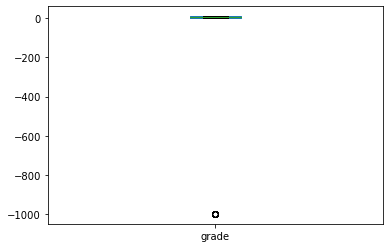

In [96]:
Notas_Cursos[Notas_Cursos['online_progress']>=-1].grade.plot(kind ="box")

In [97]:
Notas_Cursos.describe()

enroll_grade_id  active_flag    course_id    enroll_id        grade  \
count      3235.000000  3235.000000  3235.000000  3235.000000  3235.000000   
mean      20826.524575     0.978671   199.890572   853.059042  -598.743686   
std        5867.881146     0.144502    72.942386   144.606747   491.878559   
min         564.000000     0.000000    10.000000   465.000000  -999.000000   
25%       18907.500000     1.000000   201.000000   787.500000  -999.000000   
50%       22566.000000     1.000000   230.000000   907.000000  -999.000000   
75%       24703.500000     1.000000   240.000000   957.000000     0.000000   
max       27042.000000     1.000000   306.000000  1016.000000    10.000000   

       online_progress      user_id  
count      3235.000000  3235.000000  
mean       -590.095929   291.537867  
std         505.578019   126.848377  
min        -999.000000     3.000000  
25%        -999.000000   191.500000  
50%        -999.000000   348.000000  
75%           0.000000   392.000000  
max         100.000000   436.000000

In [98]:
Roles

Unnamed: 0  role_id    role_name
0           0        1    LBL_ADMIN
1           1        2  LBL_MANAGER
2           2        3    LBL_TUTOR
3           3        4  LBL_STUDENT

In [99]:
Roles.columns

Index(['Unnamed: 0', 'role_id', 'role_name'], dtype='object')

In [100]:
Roles.shape

(4, 3)

In [101]:
Roles.info

<bound method DataFrame.info of    Unnamed: 0  role_id    role_name
0           0        1    LBL_ADMIN
1           1        2  LBL_MANAGER
2           2        3    LBL_TUTOR
3           3        4  LBL_STUDENT>

In [102]:
#Tipo de variables
Roles.dtypes

Unnamed: 0     int64
role_id        int64
role_name     object
dtype: object

In [103]:
#Duplicados
Roles.duplicated().sum() #busca duplicados de fila completa

0

In [104]:
#NA'S
Roles.isna()
Roles.isna().sum()

Unnamed: 0    0
role_id       0
role_name     0
dtype: int64

In [105]:
#Eliminamos la columna 'Unnamed: 0' ya que no aporta valor.
Roles=Roles.drop(['Unnamed: 0'], axis=1)

In [106]:
Roles

role_id    role_name
0        1    LBL_ADMIN
1        2  LBL_MANAGER
2        3    LBL_TUTOR
3        4  LBL_STUDENT

In [107]:
Plantas

Unnamed: 0  planta_id       planta_name
0            0          1       ABP Bergara
1            1          2      ABP Arrasate
2            2          3       ABP Kunshan
3            3          4        ABP México
4            4          5   MT Aretxabaleta
5            5          6     MT Eslovaquia
6            6          7               SAT
7            7          8    LPP Eskoriatza
8            8          9      LPD Arrasate
9            9         10       LPC Usurbil
10          10         11           Tafalla
11          11         12        GISEDERLAN
12          12         13            BRASIL
13          13         14           EDERTEK
14          14         15  BULEGO OROKORRAK
15          15         16      Fagorederlan
16          16         17            PLANTA
17          17         18      MT Aretxabal

In [108]:
Plantas=Plantas.drop(['Unnamed: 0'], axis=1)

In [109]:
Plantas.dtypes

planta_id       int64
planta_name    object
dtype: object

In [110]:
#Duplicados
Plantas.duplicated().sum() # busca duplicados de fila completa

0

In [111]:
#NA'S
Plantas.isna().sum()

planta_id      0
planta_name    0
dtype: int64

In [112]:
Plantas

planta_id       planta_name
0           1       ABP Bergara
1           2      ABP Arrasate
2           3       ABP Kunshan
3           4        ABP México
4           5   MT Aretxabaleta
5           6     MT Eslovaquia
6           7               SAT
7           8    LPP Eskoriatza
8           9      LPD Arrasate
9          10       LPC Usurbil
10         11           Tafalla
11         12        GISEDERLAN
12         13            BRASIL
13         14           EDERTEK
14         15  BULEGO OROKORRAK
15         16      Fagorederlan
16         17            PLANTA
17         18      MT Aretxabal

In [113]:
Accesos

Unnamed: 0       description                  timestamp  mdl_user_id  \
0              0   LOGIN AS SRM OK  2021-09-14T13:26:51+01:00            3   
1              1   LOGIN AS SRM OK  2021-10-13T10:54:42+01:00            3   
2              2   LOGIN AS SRM OK  2021-10-13T11:53:33+01:00            3   
3              3   LOGIN AS SRM OK  2021-10-14T14:28:42+01:00            3   
4              4   LOGIN AS SRM OK  2021-10-14T14:30:07+01:00            3   
...          ...               ...                        ...          ...   
8811        8811  LOGOUT AS SRM OK       2020-11-15T19:06:36Z            3   
8812        8812  LOGOUT AS SRM OK       2020-11-15T19:12:58Z            3   
8813        8813  LOGOUT AS SRM OK       2020-11-15T19:39:17Z            3   
8814        8814  LOGOUT AS SRM OK  2021-10-13T10:39:17+01:00            3   
8815        8815  LOGOUT AS SRM OK  2021-10-13T11:35:21+01:00            3   

      user_id  
0         134  
1         134  
2         134  
3         134  
4         134  
...       ...  
8811      134  
8812      134  
8813      134  
8814      134  
8815      134  

[8816 rows x 5 columns]

In [114]:
Accesos=Accesos.drop(['Unnamed: 0'], axis=1)

In [115]:
Accesos.dtypes

description    object
timestamp      object
mdl_user_id     int64
user_id         int64
dtype: object

In [116]:
Accesos['timestamp']= pd.to_datetime(Accesos['timestamp'],utc=True)

In [117]:
Accesos

description                 timestamp  mdl_user_id  user_id
0      LOGIN AS SRM OK 2021-09-14 12:26:51+00:00            3      134
1      LOGIN AS SRM OK 2021-10-13 09:54:42+00:00            3      134
2      LOGIN AS SRM OK 2021-10-13 10:53:33+00:00            3      134
3      LOGIN AS SRM OK 2021-10-14 13:28:42+00:00            3      134
4      LOGIN AS SRM OK 2021-10-14 13:30:07+00:00            3      134
...                ...                       ...          ...      ...
8811  LOGOUT AS SRM OK 2020-11-15 19:06:36+00:00            3      134
8812  LOGOUT AS SRM OK 2020-11-15 19:12:58+00:00            3      134
8813  LOGOUT AS SRM OK 2020-11-15 19:39:17+00:00            3      134
8814  LOGOUT AS SRM OK 2021-10-13 09:39:17+00:00            3      134
8815  LOGOUT AS SRM OK 2021-10-13 10:35:21+00:00            3      134

[8816 rows x 4 columns]

In [118]:
Accesos.dtypes

description                 object
timestamp      datetime64[ns, UTC]
mdl_user_id                  int64
user_id                      int64
dtype: object

In [119]:
#Duplicados
Accesos.duplicated().sum() # busca duplicados de fila completa

26

In [120]:
Accesos=Accesos.drop_duplicates()

In [121]:
Accesos.duplicated().sum()

0

In [122]:
Accesos['timestamp']=Accesos['timestamp'].dt.tz_localize(None)

<ipython-input-122-02951ef7655a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Accesos['timestamp']=Accesos['timestamp'].dt.tz_localize(None)


In [123]:
Accesos.isna().sum()

description    0
timestamp      0
mdl_user_id    0
user_id        0
dtype: int64

In [124]:
Accesos.describe()

mdl_user_id      user_id
count  8790.000000  8790.000000
mean    108.729465   142.867577
std     108.199826    64.462490
min       3.000000     3.000000
25%      11.000000   134.000000
50%      41.000000   135.000000
75%     190.000000   145.000000
max     461.000000   436.000000

In [125]:
Accesos

description           timestamp  mdl_user_id  user_id
0      LOGIN AS SRM OK 2021-09-14 12:26:51            3      134
1      LOGIN AS SRM OK 2021-10-13 09:54:42            3      134
2      LOGIN AS SRM OK 2021-10-13 10:53:33            3      134
3      LOGIN AS SRM OK 2021-10-14 13:28:42            3      134
4      LOGIN AS SRM OK 2021-10-14 13:30:07            3      134
...                ...                 ...          ...      ...
8811  LOGOUT AS SRM OK 2020-11-15 19:06:36            3      134
8812  LOGOUT AS SRM OK 2020-11-15 19:12:58            3      134
8813  LOGOUT AS SRM OK 2020-11-15 19:39:17            3      134
8814  LOGOUT AS SRM OK 2021-10-13 09:39:17            3      134
8815  LOGOUT AS SRM OK 2021-10-13 10:35:21            3      134

[8790 rows x 4 columns]

In [126]:
Acceso_1ero_ultimo

Unnamed: 0  mdl_user_id                                1er acceso  \
0             0            3   jueves, 20 de septiembre de 2018, 12:19   
1             1           10  viernes, 28 de septiembre de 2018, 12:49   
2             2           11   sábado, 29 de septiembre de 2018, 18:35   
3             3           13       martes, 2 de octubre de 2018, 09:46   
4             4           14       martes, 2 de octubre de 2018, 18:42   
..          ...          ...                                       ...   
367         367          457                                        --   
368         368          458                                        --   
369         369          459                                        --   
370         370          460                                        --   
371         371          461      jueves, 28 de octubre de 2021, 15:43   

                             ultimo acceso  
0    viernes, 29 de octubre de 2021, 15:42  
1    miércoles, 14 de julio de 2021, 16:28  
2      martes, 5 de octubre de 2021, 10:12  
3       jueves, 5 de agosto de 2021, 12:34  
4        lunes, 19 de julio de 2021, 12:37  
..                                     ...  
367                                     --  
368                                     --  
369                                     --  
370                                     --  
371   jueves, 28 de octubre de 2021, 16:03  

[372 rows x 4 columns]

In [127]:
Acceso_1ero_ultimo.dtypes

Unnamed: 0        int64
mdl_user_id       int64
1er acceso       object
ultimo acceso    object
dtype: object

In [128]:
Acceso_1ero_ultimo=Acceso_1ero_ultimo.drop(['Unnamed: 0'], axis=1)

In [129]:
#Duplicados
Acceso_1ero_ultimo.duplicated().sum() # busca duplicados de fila completa

0

In [130]:
Acceso_1ero_ultimo['1er acceso'][Acceso_1ero_ultimo['1er acceso']=="--"]=None
Acceso_1ero_ultimo['ultimo acceso'][Acceso_1ero_ultimo['ultimo acceso']=="--"]=None

<ipython-input-130-7c59f6b7e52e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Acceso_1ero_ultimo['1er acceso'][Acceso_1ero_ultimo['1er acceso']=="--"]=None
<ipython-input-130-7c59f6b7e52e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Acceso_1ero_ultimo['ultimo acceso'][Acceso_1ero_ultimo['ultimo acceso']=="--"]=None


In [131]:
Acceso_1ero_ultimo

mdl_user_id                                1er acceso  \
0              3   jueves, 20 de septiembre de 2018, 12:19   
1             10  viernes, 28 de septiembre de 2018, 12:49   
2             11   sábado, 29 de septiembre de 2018, 18:35   
3             13       martes, 2 de octubre de 2018, 09:46   
4             14       martes, 2 de octubre de 2018, 18:42   
..           ...                                       ...   
367          457                                      None   
368          458                                      None   
369          459                                      None   
370          460                                      None   
371          461      jueves, 28 de octubre de 2021, 15:43   

                             ultimo acceso  
0    viernes, 29 de octubre de 2021, 15:42  
1    miércoles, 14 de julio de 2021, 16:28  
2      martes, 5 de octubre de 2021, 10:12  
3       jueves, 5 de agosto de 2021, 12:34  
4        lunes, 19 de julio de 2021, 12:37  
..                                     ...  
367                                   None  
368                                   None  
369                                   None  
370                                   None  
371   jueves, 28 de octubre de 2021, 16:03  

[372 rows x 3 columns]

In [132]:
Acceso_1ero_ultimo.isna().sum()

mdl_user_id       0
1er acceso       77
ultimo acceso    76
dtype: int64

In [133]:
Acceso_1ero_ultimo.duplicated(subset = ['1er acceso', 'ultimo acceso']).sum()

76

In [134]:
Acceso_1ero_ultimo[Acceso_1ero_ultimo.duplicated(subset = ['1er acceso', 'ultimo acceso'])].fillna('1999-01-01 00:00')

mdl_user_id                          1er acceso  \
47            64                    1999-01-01 00:00   
48            65                    1999-01-01 00:00   
56            76                    1999-01-01 00:00   
62            84                    1999-01-01 00:00   
75            99  jueves, 27 de junio de 2019, 20:13   
..           ...                                 ...   
366          456                    1999-01-01 00:00   
367          457                    1999-01-01 00:00   
368          458                    1999-01-01 00:00   
369          459                    1999-01-01 00:00   
370          460                    1999-01-01 00:00   

                          ultimo acceso  
47                     1999-01-01 00:00  
48                     1999-01-01 00:00  
56                     1999-01-01 00:00  
62                     1999-01-01 00:00  
75   jueves, 27 de junio de 2019, 20:13  
..                                  ...  
366                    1999-01-01 00:00  
367                    1999-01-01 00:00  
368                    1999-01-01 00:00  
369                    1999-01-01 00:00  
370                    1999-01-01 00:00  

[76 rows x 3 columns]

In [135]:
Acceso_1ero_ultimo[Acceso_1ero_ultimo.duplicated(subset = ['1er acceso', 'ultimo acceso'])]=Acceso_1ero_ultimo[Acceso_1ero_ultimo.duplicated(subset = ['1er acceso', 'ultimo acceso'])].fillna('1999-01-01 00:00')

In [136]:
Acceso_1ero_ultimo.isna().sum()

mdl_user_id      0
1er acceso       2
ultimo acceso    1
dtype: int64

In [137]:
Acceso_1ero_ultimo[Acceso_1ero_ultimo['1er acceso'].isna()]

mdl_user_id 1er acceso                       ultimo acceso
46            63       None                                None
132          165       None  martes, 29 de junio de 2021, 12:55

In [138]:
Acceso_1ero_ultimo[Acceso_1ero_ultimo['1er acceso'].isna()]='1999-01-01 00:00'

In [139]:
Acceso_1ero_ultimo.isna().sum()

mdl_user_id      0
1er acceso       0
ultimo acceso    0
dtype: int64

In [140]:
for a in Acceso_1ero_ultimo.index:
    if Acceso_1ero_ultimo.loc[a,'ultimo acceso']!='1999-01-01 00:00': 
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'][Acceso_1ero_ultimo.loc[a,'ultimo acceso'].find(' '):]
    else:
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso']

In [141]:
Acceso_1ero_ultimo['ultimo acceso']

0       29 de octubre de 2021, 15:42
1         14 de julio de 2021, 16:28
2        5 de octubre de 2021, 10:12
3         5 de agosto de 2021, 12:34
4         19 de julio de 2021, 12:37
                   ...              
367                 1999-01-01 00:00
368                 1999-01-01 00:00
369                 1999-01-01 00:00
370                 1999-01-01 00:00
371     28 de octubre de 2021, 16:03
Name: ultimo acceso, Length: 372, dtype: object

In [142]:
for a in Acceso_1ero_ultimo.index:
    if Acceso_1ero_ultimo.loc[a,'1er acceso']!='1999-01-01 00:00': 
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'][Acceso_1ero_ultimo.loc[a,'1er acceso'].find(' '):]
    else:
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso']

In [143]:
for a in Acceso_1ero_ultimo.index:
    Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'].replace(' de ','-')

In [144]:
for a in Acceso_1ero_ultimo.index:
    Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'].replace(' de ','-')

In [145]:
for a in Acceso_1ero_ultimo.index:
    if Acceso_1ero_ultimo.loc[a,'ultimo acceso'].find('enero'): 
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'].replace('enero','January')
    if Acceso_1ero_ultimo.loc[a,'ultimo acceso'].find('febrero'): 
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'].replace('febrero','February')
    if Acceso_1ero_ultimo.loc[a,'ultimo acceso'].find('marzo'): 
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'].replace('marzo','March')
    if Acceso_1ero_ultimo.loc[a,'ultimo acceso'].find('abril'): 
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'].replace('abril','April')
    if Acceso_1ero_ultimo.loc[a,'ultimo acceso'].find('mayo'): 
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'].replace('mayo','May')
    if Acceso_1ero_ultimo.loc[a,'ultimo acceso'].find('junio'): 
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'].replace('junio','June')
    if Acceso_1ero_ultimo.loc[a,'ultimo acceso'].find('julio'): 
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'].replace('julio','July')
    if Acceso_1ero_ultimo.loc[a,'ultimo acceso'].find('agosto'): 
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'].replace('agosto','August')
    if Acceso_1ero_ultimo.loc[a,'ultimo acceso'].find('septiembre'): 
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'].replace('septiembre','September')
    if Acceso_1ero_ultimo.loc[a,'ultimo acceso'].find('octubre'): 
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'].replace('octubre','October')
    if Acceso_1ero_ultimo.loc[a,'ultimo acceso'].find('noviembre'): 
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'].replace('noviembre','November')
    if Acceso_1ero_ultimo.loc[a,'ultimo acceso'].find('diciembre'): 
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso'].replace('diciembre','December')
    else:
        Acceso_1ero_ultimo.loc[a,'ultimo acceso']=Acceso_1ero_ultimo.loc[a,'ultimo acceso']
        

In [146]:
for a in Acceso_1ero_ultimo.index:
    if Acceso_1ero_ultimo.loc[a,'1er acceso'].find('enero'): 
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'].replace('enero','January')
    if Acceso_1ero_ultimo.loc[a,'1er acceso'].find('febrero'): 
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'].replace('febrero','February')
    if Acceso_1ero_ultimo.loc[a,'1er acceso'].find('marzo'): 
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'].replace('marzo','March')
    if Acceso_1ero_ultimo.loc[a,'1er acceso'].find('abril'): 
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'].replace('abril','April')
    if Acceso_1ero_ultimo.loc[a,'1er acceso'].find('mayo'): 
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'].replace('mayo','May')
    if Acceso_1ero_ultimo.loc[a,'1er acceso'].find('junio'): 
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'].replace('junio','June')
    if Acceso_1ero_ultimo.loc[a,'1er acceso'].find('julio'): 
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'].replace('julio','July')
    if Acceso_1ero_ultimo.loc[a,'1er acceso'].find('agosto'): 
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'].replace('agosto','August')
    if Acceso_1ero_ultimo.loc[a,'1er acceso'].find('septiembre'): 
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'].replace('septiembre','September')
    if Acceso_1ero_ultimo.loc[a,'1er acceso'].find('octubre'): 
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'].replace('octubre','October')
    if Acceso_1ero_ultimo.loc[a,'1er acceso'].find('noviembre'): 
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'].replace('noviembre','November')
    if Acceso_1ero_ultimo.loc[a,'1er acceso'].find('diciembre'): 
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso'].replace('diciembre','December')
    else:
        Acceso_1ero_ultimo.loc[a,'1er acceso']=Acceso_1ero_ultimo.loc[a,'1er acceso']

In [147]:
Acceso_1ero_ultimo['1er acceso']=pd.to_datetime(Acceso_1ero_ultimo['1er acceso'])
Acceso_1ero_ultimo['ultimo acceso']=pd.to_datetime(Acceso_1ero_ultimo['ultimo acceso'])

In [148]:
Acceso_1ero_ultimo['tiempo_activo(s)']=(Acceso_1ero_ultimo['ultimo acceso']-Acceso_1ero_ultimo['1er acceso']).dt.total_seconds()

In [149]:
Acceso_1ero_ultimo

mdl_user_id          1er acceso       ultimo acceso  tiempo_activo(s)
0             3 2018-09-20 12:19:00 2021-10-29 15:42:00        98076180.0
1            10 2018-09-28 12:49:00 2021-07-14 16:28:00        88141140.0
2            11 2018-09-29 18:35:00 2021-10-05 10:12:00        95182620.0
3            13 2018-10-02 09:46:00 2021-08-05 12:34:00        89693280.0
4            14 2018-10-02 18:42:00 2021-07-19 12:37:00        88192500.0
..          ...                 ...                 ...               ...
367         457 1999-01-01 00:00:00 1999-01-01 00:00:00               0.0
368         458 1999-01-01 00:00:00 1999-01-01 00:00:00               0.0
369         459 1999-01-01 00:00:00 1999-01-01 00:00:00               0.0
370         460 1999-01-01 00:00:00 1999-01-01 00:00:00               0.0
371         461 2021-10-28 15:43:00 2021-10-28 16:03:00            1200.0

[372 rows x 4 columns]

In [150]:
Actividades[Actividades['course_id']==66]['course_name']='FED_01_ES_01 - Información Moodle'

<ipython-input-150-8d4f7fcbab1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Actividades[Actividades['course_id']==66]['course_name']='FED_01_ES_01 - Información Moodle'


In [151]:
Acceso_1ero_ultimo

mdl_user_id          1er acceso       ultimo acceso  tiempo_activo(s)
0             3 2018-09-20 12:19:00 2021-10-29 15:42:00        98076180.0
1            10 2018-09-28 12:49:00 2021-07-14 16:28:00        88141140.0
2            11 2018-09-29 18:35:00 2021-10-05 10:12:00        95182620.0
3            13 2018-10-02 09:46:00 2021-08-05 12:34:00        89693280.0
4            14 2018-10-02 18:42:00 2021-07-19 12:37:00        88192500.0
..          ...                 ...                 ...               ...
367         457 1999-01-01 00:00:00 1999-01-01 00:00:00               0.0
368         458 1999-01-01 00:00:00 1999-01-01 00:00:00               0.0
369         459 1999-01-01 00:00:00 1999-01-01 00:00:00               0.0
370         460 1999-01-01 00:00:00 1999-01-01 00:00:00               0.0
371         461 2021-10-28 15:43:00 2021-10-28 16:03:00            1200.0

[372 rows x 4 columns]

In [152]:
pd.to_datetime(Acceso_1ero_ultimo['ultimo acceso'])

0     2021-10-29 15:42:00
1     2021-07-14 16:28:00
2     2021-10-05 10:12:00
3     2021-08-05 12:34:00
4     2021-07-19 12:37:00
              ...        
367   1999-01-01 00:00:00
368   1999-01-01 00:00:00
369   1999-01-01 00:00:00
370   1999-01-01 00:00:00
371   2021-10-28 16:03:00
Name: ultimo acceso, Length: 372, dtype: datetime64[ns]

In [153]:
Actividades

Unnamed: 0  mdl_user_id                           course_name  \
0              0          190  A - FORMACIÓN ESPECÍFICA CALIDAD ABP   
1              1          190  A - FORMACIÓN ESPECÍFICA CALIDAD ABP   
2              2          296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP   
3              3          296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP   
4              4          299  A - FORMACIÓN ESPECÍFICA CALIDAD ABP   
...          ...          ...                                   ...   
3459        3459           21                Trazabilidad LPPFe MEC   
3460        3460           21                Trazabilidad LPPFe MEC   
3461        3461           21                Trazabilidad LPPFe MEC   
3462        3462          339                Trazabilidad LPPFe MEC   
3463        3463          339                Trazabilidad LPPFe MEC   

      course_id                     category  \
0           224    TÉCNICOS/TECNOLÓGICOS ABP   
1           224    TÉCNICOS/TECNOLÓGICOS ABP   
2           224    TÉCNICOS/TECNOLÓGICOS ABP   
3           224    TÉCNICOS/TECNOLÓGICOS ABP   
4           224    TÉCNICOS/TECNOLÓGICOS ABP   
...         ...                          ...   
3459        278  Técnico / Tecnológico LPPFE   
3460        278  Técnico / Tecnológico LPPFE   
3461        278  Técnico / Tecnológico LPPFE   
3462        278  Técnico / Tecnológico LPPFE   
3463        278  Técnico / Tecnológico LPPFE   

                                         actividad_name  grade  \
0                                            TEST FINAL    NaN   
1          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total    NaN   
2          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total   9.32   
3                                            TEST FINAL   9.32   
4                                            TEST FINAL   9.66   
...                                                 ...    ...   
3459  TEST - Enbalajearen etiketa / Etiquetado de em...   9.29   
3460                     Trazabilidad LPPFe MEC - Total   9.29   
3461                     Trazabilidad LPPFe MEC - Total   9.29   
3462                     Trazabilidad LPPFe MEC - Total  10.00   
3463  TEST - Enbalajearen etiketa / Etiquetado de em...  10.00   

                     time  
0                     NaN  
1                     NaN  
2     2020-12-18 15:25:05  
3     2020-12-18 15:25:05  
4     2020-12-18 16:45:34  
...                   ...  
3459  2021-06-14 16:36:31  
3460  2021-06-14 16:36:32  
3461  2021-06-14 16:36:32  
3462  2021-06-14 10:13:15  
3463  2021-06-14 10:13:15  

[3464 rows x 8 columns]

In [154]:
Actividades=Actividades.drop(['Unnamed: 0'], axis=1)

In [155]:
Actividades

mdl_user_id                           course_name  course_id  \
0             190  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
1             190  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
2             296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
3             296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
4             299  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
...           ...                                   ...        ...   
3459           21                Trazabilidad LPPFe MEC        278   
3460           21                Trazabilidad LPPFe MEC        278   
3461           21                Trazabilidad LPPFe MEC        278   
3462          339                Trazabilidad LPPFe MEC        278   
3463          339                Trazabilidad LPPFe MEC        278   

                         category  \
0       TÉCNICOS/TECNOLÓGICOS ABP   
1       TÉCNICOS/TECNOLÓGICOS ABP   
2       TÉCNICOS/TECNOLÓGICOS ABP   
3       TÉCNICOS/TECNOLÓGICOS ABP   
4       TÉCNICOS/TECNOLÓGICOS ABP   
...                           ...   
3459  Técnico / Tecnológico LPPFE   
3460  Técnico / Tecnológico LPPFE   
3461  Técnico / Tecnológico LPPFE   
3462  Técnico / Tecnológico LPPFE   
3463  Técnico / Tecnológico LPPFE   

                                         actividad_name  grade  \
0                                            TEST FINAL    NaN   
1          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total    NaN   
2          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total   9.32   
3                                            TEST FINAL   9.32   
4                                            TEST FINAL   9.66   
...                                                 ...    ...   
3459  TEST - Enbalajearen etiketa / Etiquetado de em...   9.29   
3460                     Trazabilidad LPPFe MEC - Total   9.29   
3461                     Trazabilidad LPPFe MEC - Total   9.29   
3462                     Trazabilidad LPPFe MEC - Total  10.00   
3463  TEST - Enbalajearen etiketa / Etiquetado de em...  10.00   

                     time  
0                     NaN  
1                     NaN  
2     2020-12-18 15:25:05  
3     2020-12-18 15:25:05  
4     2020-12-18 16:45:34  
...                   ...  
3459  2021-06-14 16:36:31  
3460  2021-06-14 16:36:32  
3461  2021-06-14 16:36:32  
3462  2021-06-14 10:13:15  
3463  2021-06-14 10:13:15  

[3464 rows x 7 columns]

In [156]:
Actividades.dtypes

mdl_user_id         int64
course_name        object
course_id           int64
category           object
actividad_name     object
grade             float64
time               object
dtype: object

In [157]:
Actividades['time']= pd.to_datetime(Actividades['time'])

In [158]:
Actividades.dtypes

mdl_user_id                int64
course_name               object
course_id                  int64
category                  object
actividad_name            object
grade                    float64
time              datetime64[ns]
dtype: object

In [159]:
#Duplicados
Actividades.duplicated().sum() # busca duplicados de fila completa

89

In [160]:
Actividades=Actividades.drop_duplicates()

In [161]:
Actividades.duplicated().sum()

0

In [162]:
Actividades.isna().sum()

mdl_user_id          0
course_name          0
course_id            0
category             0
actividad_name       4
grade             1278
time              1263
dtype: int64

In [163]:
Actividades=Actividades[Actividades['actividad_name'].notna()]

In [164]:
Actividades.isna().sum()

mdl_user_id          0
course_name          0
course_id            0
category             0
actividad_name       0
grade             1274
time              1259
dtype: int64

In [165]:
Actividades['grade']=Actividades['grade'].fillna('-999')

In [166]:
Actividades.isna().sum()

mdl_user_id          0
course_name          0
course_id            0
category             0
actividad_name       0
grade                0
time              1259
dtype: int64

In [167]:
Actividades.time=Actividades.time.fillna('1999-01-01 00:00:00')

In [168]:
Actividades

mdl_user_id                           course_name  course_id  \
0             190  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
1             190  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
2             296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
3             296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
4             299  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
...           ...                                   ...        ...   
3457          190                Trazabilidad LPPFe MEC        278   
3458           21                Trazabilidad LPPFe MEC        278   
3460           21                Trazabilidad LPPFe MEC        278   
3462          339                Trazabilidad LPPFe MEC        278   
3463          339                Trazabilidad LPPFe MEC        278   

                         category  \
0       TÉCNICOS/TECNOLÓGICOS ABP   
1       TÉCNICOS/TECNOLÓGICOS ABP   
2       TÉCNICOS/TECNOLÓGICOS ABP   
3       TÉCNICOS/TECNOLÓGICOS ABP   
4       TÉCNICOS/TECNOLÓGICOS ABP   
...                           ...   
3457  Técnico / Tecnológico LPPFE   
3458  Técnico / Tecnológico LPPFE   
3460  Técnico / Tecnológico LPPFE   
3462  Técnico / Tecnológico LPPFE   
3463  Técnico / Tecnológico LPPFE   

                                         actividad_name grade  \
0                                            TEST FINAL  -999   
1          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total  -999   
2          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total  9.32   
3                                            TEST FINAL  9.32   
4                                            TEST FINAL  9.66   
...                                                 ...   ...   
3457                     Trazabilidad LPPFe MEC - Total  -999   
3458  TEST - Enbalajearen etiketa / Etiquetado de em...  9.29   
3460                     Trazabilidad LPPFe MEC - Total  9.29   
3462                     Trazabilidad LPPFe MEC - Total  10.0   
3463  TEST - Enbalajearen etiketa / Etiquetado de em...  10.0   

                     time  
0     1999-01-01 00:00:00  
1     1999-01-01 00:00:00  
2     2020-12-18 15:25:05  
3     2020-12-18 15:25:05  
4     2020-12-18 16:45:34  
...                   ...  
3457  1999-01-01 00:00:00  
3458  2021-06-14 16:36:31  
3460  2021-06-14 16:36:32  
3462  2021-06-14 10:13:15  
3463  2021-06-14 10:13:15  

[3371 rows x 7 columns]

In [169]:
Actividades.isna().sum()

mdl_user_id       0
course_name       0
course_id         0
category          0
actividad_name    0
grade             0
time              0
dtype: int64

In [170]:
Actividades.dtypes

mdl_user_id        int64
course_name       object
course_id          int64
category          object
actividad_name    object
grade             object
time              object
dtype: object

In [171]:
Actividades['grade']=Actividades['grade'].astype('float')

In [172]:
Actividades.time=pd.to_datetime(Actividades['time'])

In [173]:
Actividades[["grade"]].describe()

grade
count  3371.000000
mean   -371.613631
std     489.093912
min    -999.000000
25%    -999.000000
50%       8.330000
75%      10.000000
max      38.850000

In [174]:
Actividades

mdl_user_id                           course_name  course_id  \
0             190  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
1             190  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
2             296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
3             296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
4             299  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
...           ...                                   ...        ...   
3457          190                Trazabilidad LPPFe MEC        278   
3458           21                Trazabilidad LPPFe MEC        278   
3460           21                Trazabilidad LPPFe MEC        278   
3462          339                Trazabilidad LPPFe MEC        278   
3463          339                Trazabilidad LPPFe MEC        278   

                         category  \
0       TÉCNICOS/TECNOLÓGICOS ABP   
1       TÉCNICOS/TECNOLÓGICOS ABP   
2       TÉCNICOS/TECNOLÓGICOS ABP   
3       TÉCNICOS/TECNOLÓGICOS ABP   
4       TÉCNICOS/TECNOLÓGICOS ABP   
...                           ...   
3457  Técnico / Tecnológico LPPFE   
3458  Técnico / Tecnológico LPPFE   
3460  Técnico / Tecnológico LPPFE   
3462  Técnico / Tecnológico LPPFE   
3463  Técnico / Tecnológico LPPFE   

                                         actividad_name   grade  \
0                                            TEST FINAL -999.00   
1          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total -999.00   
2          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total    9.32   
3                                            TEST FINAL    9.32   
4                                            TEST FINAL    9.66   
...                                                 ...     ...   
3457                     Trazabilidad LPPFe MEC - Total -999.00   
3458  TEST - Enbalajearen etiketa / Etiquetado de em...    9.29   
3460                     Trazabilidad LPPFe MEC - Total    9.29   
3462                     Trazabilidad LPPFe MEC - Total   10.00   
3463  TEST - Enbalajearen etiketa / Etiquetado de em...   10.00   

                    time  
0    1999-01-01 00:00:00  
1    1999-01-01 00:00:00  
2    2020-12-18 15:25:05  
3    2020-12-18 15:25:05  
4    2020-12-18 16:45:34  
...                  ...  
3457 1999-01-01 00:00:00  
3458 2021-06-14 16:36:31  
3460 2021-06-14 16:36:32  
3462 2021-06-14 10:13:15  
3463 2021-06-14 10:13:15  

[3371 rows x 7 columns]

<AxesSubplot:>

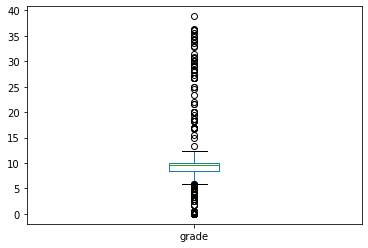

In [175]:
Actividades[Actividades['grade']>=-1].grade.plot(kind ="box")

In [176]:
Actividades=Actividades[Actividades['grade']<=10]

In [177]:
Actividades[["grade"]].describe()

grade
count  3301.000000
mean   -380.034968
std     490.784768
min    -999.000000
25%    -999.000000
50%       8.330000
75%      10.000000
max      10.000000

In [178]:
for a in Actividades.index:
    if Actividades.loc[a,'grade']>40:
        Actividades.loc[a,'grade']=Actividades.loc[a,'grade']/5
    if Actividades.loc[a,'grade']>30:
        Actividades.loc[a,'grade']=Actividades.loc[a,'grade']/4
    if Actividades.loc[a,'grade']>20:
        Actividades.loc[a,'grade']=Actividades.loc[a,'grade']/3
    if Actividades.loc[a,'grade']>10:
        Actividades.loc[a,'grade']=Actividades.loc[a,'grade']/2
    else:
        Actividades.loc[a,'grade']=Actividades.loc[a,'grade']

C:\Users\Klase\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [179]:
Actividades_10=Actividades[Actividades['grade']>0]

<AxesSubplot:>

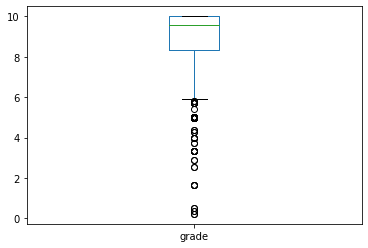

In [180]:
Actividades_10.grade.plot(kind ="box")

In [181]:
Actividades_10

mdl_user_id                           course_name  course_id  \
2             296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
3             296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
4             299  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
5             299  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
6             296           A - INTRODUCCIÓN MECANIZADO        223   
...           ...                                   ...        ...   
3455          370          TRATAMIENTO TÉRMICO ABP B_N3        193   
3458           21                Trazabilidad LPPFe MEC        278   
3460           21                Trazabilidad LPPFe MEC        278   
3462          339                Trazabilidad LPPFe MEC        278   
3463          339                Trazabilidad LPPFe MEC        278   

                         category  \
2       TÉCNICOS/TECNOLÓGICOS ABP   
3       TÉCNICOS/TECNOLÓGICOS ABP   
4       TÉCNICOS/TECNOLÓGICOS ABP   
5       TÉCNICOS/TECNOLÓGICOS ABP   
6       TÉCNICOS/TECNOLÓGICOS ABP   
...                           ...   
3455    TÉCNICOS/TECNOLÓGICOS ABP   
3458  Técnico / Tecnológico LPPFE   
3460  Técnico / Tecnológico LPPFE   
3462  Técnico / Tecnológico LPPFE   
3463  Técnico / Tecnológico LPPFE   

                                         actividad_name  grade  \
2          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total   9.32   
3                                            TEST FINAL   9.32   
4                                            TEST FINAL   9.66   
5          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total   9.66   
6                                                  TEST   8.85   
...                                                 ...    ...   
3455               TRATAMIENTO TÉRMICO ABP B_N3 - Total   9.88   
3458  TEST - Enbalajearen etiketa / Etiquetado de em...   9.29   
3460                     Trazabilidad LPPFe MEC - Total   9.29   
3462                     Trazabilidad LPPFe MEC - Total  10.00   
3463  TEST - Enbalajearen etiketa / Etiquetado de em...  10.00   

                    time  
2    2020-12-18 15:25:05  
3    2020-12-18 15:25:05  
4    2020-12-18 16:45:34  
5    2020-12-18 16:45:34  
6    2020-12-18 14:54:05  
...                  ...  
3455 2021-10-14 23:55:13  
3458 2021-06-14 16:36:31  
3460 2021-06-14 16:36:32  
3462 2021-06-14 10:13:15  
3463 2021-06-14 10:13:15  

[2014 rows x 7 columns]

In [182]:
Actividades_10

mdl_user_id                           course_name  course_id  \
2             296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
3             296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
4             299  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
5             299  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
6             296           A - INTRODUCCIÓN MECANIZADO        223   
...           ...                                   ...        ...   
3455          370          TRATAMIENTO TÉRMICO ABP B_N3        193   
3458           21                Trazabilidad LPPFe MEC        278   
3460           21                Trazabilidad LPPFe MEC        278   
3462          339                Trazabilidad LPPFe MEC        278   
3463          339                Trazabilidad LPPFe MEC        278   

                         category  \
2       TÉCNICOS/TECNOLÓGICOS ABP   
3       TÉCNICOS/TECNOLÓGICOS ABP   
4       TÉCNICOS/TECNOLÓGICOS ABP   
5       TÉCNICOS/TECNOLÓGICOS ABP   
6       TÉCNICOS/TECNOLÓGICOS ABP   
...                           ...   
3455    TÉCNICOS/TECNOLÓGICOS ABP   
3458  Técnico / Tecnológico LPPFE   
3460  Técnico / Tecnológico LPPFE   
3462  Técnico / Tecnológico LPPFE   
3463  Técnico / Tecnológico LPPFE   

                                         actividad_name  grade  \
2          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total   9.32   
3                                            TEST FINAL   9.32   
4                                            TEST FINAL   9.66   
5          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total   9.66   
6                                                  TEST   8.85   
...                                                 ...    ...   
3455               TRATAMIENTO TÉRMICO ABP B_N3 - Total   9.88   
3458  TEST - Enbalajearen etiketa / Etiquetado de em...   9.29   
3460                     Trazabilidad LPPFe MEC - Total   9.29   
3462                     Trazabilidad LPPFe MEC - Total  10.00   
3463  TEST - Enbalajearen etiketa / Etiquetado de em...  10.00   

                    time  
2    2020-12-18 15:25:05  
3    2020-12-18 15:25:05  
4    2020-12-18 16:45:34  
5    2020-12-18 16:45:34  
6    2020-12-18 14:54:05  
...                  ...  
3455 2021-10-14 23:55:13  
3458 2021-06-14 16:36:31  
3460 2021-06-14 16:36:32  
3462 2021-06-14 10:13:15  
3463 2021-06-14 10:13:15  

[2014 rows x 7 columns]

In [183]:
Actividades.dtypes

mdl_user_id                int64
course_name               object
course_id                  int64
category                  object
actividad_name            object
grade                    float64
time              datetime64[ns]
dtype: object

En grades las notas -999 son missings, y en time 1999 son missings

In [184]:
Usuarios

user_id useranonimo_name  active_flag language  last_access  mdl_user_id  \
0          3      username_03            1       es          NaN         13.0   
1          4      username_04            1       es          NaN         14.0   
2          5      username_05            1       es          NaN         15.0   
3          6      username_06            1       es          NaN         17.0   
4          7      username_07            1       es          NaN         18.0   
..       ...              ...          ...      ...          ...          ...   
415      432     username_432            1       es          NaN        457.0   
416      433     username_433            1       es          NaN        458.0   
417      434     username_434            1       es          NaN        459.0   
418      435     username_435            1       es          NaN        460.0   
419      436     username_436            1       es          NaN        461.0   

     role_admin  role_manager  role_student  role_tutor      planta_name  \
0             0             0             1           0      ABP Bergara   
1             0             0             1           0     Fagorederlan   
2             0             0             1           0     ABP Arrasate   
3             0             0             1           0     Fagorederlan   
4             0             0             1           0     ABP Arrasate   
..          ...           ...           ...         ...              ...   
415           0             0             1           0  MT Aretxabaleta   
416           0             0             1           0  MT Aretxabaleta   
417           0             0             1           0  MT Aretxabaleta   
418           0             0             1           0  MT Aretxabaleta   
419           0             1             1           1      ABP Bergara   

     Unnamed: 11  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
415          NaN  
416          NaN  
417          NaN  
418          NaN  
419          NaN  

[405 rows x 12 columns]

In [185]:
Usuarios['role_admin'][Usuarios['role_admin']==1]='1'

<ipython-input-185-fe8ac8981607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Usuarios['role_admin'][Usuarios['role_admin']==1]='1'


In [186]:
Usuarios['role_manager'][Usuarios['role_manager']==1]='2'

<ipython-input-186-dc3c2b2fa36b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Usuarios['role_manager'][Usuarios['role_manager']==1]='2'


In [187]:
Usuarios['role_student'][Usuarios['role_student']==1]='4'

<ipython-input-187-978c350201a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Usuarios['role_student'][Usuarios['role_student']==1]='4'


In [188]:
Usuarios['role_tutor'][Usuarios['role_tutor']==1]='3'

<ipython-input-188-6c202fc12b70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Usuarios['role_tutor'][Usuarios['role_tutor']==1]='3'


In [189]:
Usuarios

user_id useranonimo_name  active_flag language  last_access  mdl_user_id  \
0          3      username_03            1       es          NaN         13.0   
1          4      username_04            1       es          NaN         14.0   
2          5      username_05            1       es          NaN         15.0   
3          6      username_06            1       es          NaN         17.0   
4          7      username_07            1       es          NaN         18.0   
..       ...              ...          ...      ...          ...          ...   
415      432     username_432            1       es          NaN        457.0   
416      433     username_433            1       es          NaN        458.0   
417      434     username_434            1       es          NaN        459.0   
418      435     username_435            1       es          NaN        460.0   
419      436     username_436            1       es          NaN        461.0   

    role_admin role_manager role_student role_tutor      planta_name  \
0            0            0            4          0      ABP Bergara   
1            0            0            4          0     Fagorederlan   
2            0            0            4          0     ABP Arrasate   
3            0            0            4          0     Fagorederlan   
4            0            0            4          0     ABP Arrasate   
..         ...          ...          ...        ...              ...   
415          0            0            4          0  MT Aretxabaleta   
416          0            0            4          0  MT Aretxabaleta   
417          0            0            4          0  MT Aretxabaleta   
418          0            0            4          0  MT Aretxabaleta   
419          0            2            4          3      ABP Bergara   

     Unnamed: 11  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
415          NaN  
416          NaN  
417          NaN  
418          NaN  
419          NaN  

[405 rows x 12 columns]

In [190]:
#Usuarios['role']=Usuarios["role_admin"].astype(str)+' ' + Usuarios["role_manager"].astype(str)+ ' '+Usuarios["role_tutor"].astype(str)+' '+ Usuarios["role_student"].astype(str)

In [191]:
#Usuarios['role'].unique()

In [192]:
#Usuarios['role']=Usuarios['role'].replace('0',"")

In [193]:
#Usuarios['role'].unique()

In [194]:
Roles

role_id    role_name
0        1    LBL_ADMIN
1        2  LBL_MANAGER
2        3    LBL_TUTOR
3        4  LBL_STUDENT

In [195]:
dfs={'Usuarios':Usuarios,'Tutores_perfil':Tutores_perfil,'Conocimientos':Conocimientos,'Cursos':Cursos,'Programas':Programas,
    'Cursos_en_Programas':Cursos_en_Programas,'Itinearios':Itinearios,'Notas_Cursos':Notas_Cursos,'Roles':Roles,'Plantas':Plantas,
    'Accesos':Accesos,'Acceso_1ero_ultimo':Acceso_1ero_ultimo,'Actividades':Actividades}

In [196]:
#writer = pd.ExcelWriter('RETO6.xlsx', engine='xlsxwriter')

#for sheet_name in dfs.keys():
   # dfs[sheet_name].to_excel(writer, sheet_name=sheet_name, index=False)
    
#writer.save()

In [197]:
curact=pd.merge(Actividades,Cursos,on=['course_id','course_name'])

In [198]:
Cursos

course_id                             course_name  category_curso_id  \
0            1                  EDERJakin FagorEDERLAN                  0   
1            2           ITINERARIO GRADO DUAL 2018/19                  3   
2            6           ITINERARIO CICLO DUAL 2018/19                  3   
3            9        TEC_01 - PRODUCTOS FAGOR EDERLAN                  3   
4           10           TEC_02 - PROCESOS PRODUCTIVOS                  3   
..         ...                                     ...                ...   
134        303  CONTROL VISUAL MEC - MLA IKUS KONTROLA                 27   
135        304   CONTROL VISUAL MEC - BR IKUS KONTROLA                 27   
136        305                CONTROL VISUAL MEC - UKL                 27   
137        306                              CURSO UXUE                 27   
138        307            FUSIOA ABP - FUSIO DORREA N2                 27   

     hours  sortorder                                            summary  
0        0          1                                    No especificado  
1        0      40016  Itinerario de Aprendizaje del GRADO DUAL en Fa...  
2        0      40014  Itinerario de Aprendizaje del CICLO DUAL en Fa...  
3        4      40022  Conocer los PRODUCTOS fabricados de Fagor EDERLAN  
4       20      40024  Conocer los PROCESOS PRODUCTIVOS de Fagor EDERLAN  
..     ...        ...                                                ...  
134      0     110003                                    No especificado  
135      0     110002                                    No especificado  
136      0     110001                                    No especificado  
137      0          0                                    No especificado  
138     40          0                                    No especificado  

[139 rows x 6 columns]

In [199]:
print(len(Actividades.groupby(["course_name"]).count().index))
print(len(Actividades.groupby(["course_id"]).count().index))
print(len(Cursos.groupby(["course_name"]).count().index))
print(len(Cursos.groupby(["course_id"]).count().index))

81
81
139
139


In [200]:
Actividades.shape

(3301, 7)

In [201]:
curact.shape

(3233, 11)

In [202]:
Actividades['course_id'].sort_values().unique()

array([  9,  10,  12,  13,  15,  18,  19,  23,  24,  25,  29,  35,  57,
        59,  60,  61,  62,  63,  64,  66,  69,  70,  72,  74,  86, 107,
       109, 144, 157, 158, 193, 196, 201, 202, 203, 205, 207, 212, 216,
       217, 218, 219, 220, 222, 223, 224, 225, 230, 231, 232, 234, 235,
       236, 237, 239, 240, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       268, 275, 276, 277, 278, 280, 285, 286, 287, 288, 290, 298, 299,
       301, 302, 304], dtype=int64)

In [203]:
Cursos['course_id'].sort_values().unique()

array([  1,   2,   6,   9,  10,  12,  13,  15,  18,  19,  21,  23,  24,
        25,  29,  30,  32,  35,  36,  37,  38,  39,  41,  43,  46,  50,
        51,  54,  57,  58,  59,  60,  61,  62,  63,  64,  66,  67,  69,
        70,  72,  74,  79,  86, 107, 109, 144, 155, 157, 158, 193, 194,
       195, 196, 201, 202, 203, 204, 205, 206, 207, 212, 216, 217, 218,
       219, 220, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 239, 240, 242, 246, 247, 248, 249, 250, 251,
       252, 253, 254, 256, 257, 258, 259, 260, 262, 268, 269, 270, 271,
       272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,
       285, 286, 287, 288, 290, 291, 292, 293, 294, 295, 296, 297, 298,
       299, 300, 301, 302, 303, 304, 305, 306, 307], dtype=int64)

In [204]:
merges = Actividades.merge(Cursos.drop_duplicates(), on=['course_name'], 
                   how='left', indicator=True)

In [205]:
merges[merges['_merge']== 'left_only']['course_name'].unique()

array(['FED_01_ES_01 - Pruebas EDERJAKIN',
       'FED_03_ES_01 - Pruebas EDERJAKIN'], dtype=object)

In [206]:
merges[merges['_merge']== 'left_only']['course_id_x'].unique()

array([ 66, 207], dtype=int64)

In [207]:
Cursos[Cursos['course_id']==207]

course_id                        course_name  category_curso_id  hours  \
60        207  FED_01_ES_02 - Información Moodle                 35     20   

    sortorder          summary  
60      50006  No especificado

In [208]:
Notas_Cursos[Notas_Cursos['course_id']==207].head(1)

enroll_grade_id  active_flag  course_id  enroll_id  grade  \
1645            18708            1        207        814   4.53   

      online_progress                        course_name  user_id  
1645              0.0  FED_01_ES_02 - Información Moodle      138

In [209]:
Cursos[Cursos['course_id']==66]

course_id                        course_name  category_curso_id  hours  \
36         66  FED_01_ES_01 - Información Moodle                 35     10   

    sortorder                                            summary  
36      50004  Este módulo contiene información para los Admi...

In [210]:
Notas_Cursos[Notas_Cursos['course_id']==66].head(1)

enroll_grade_id  active_flag  course_id  enroll_id  grade  \
1638            16674            1         66        775   10.0   

      online_progress                        course_name  user_id  
1638              0.0  FED_01_ES_01 - Información Moodle      141

In [211]:
for a in Actividades.index:
    if Actividades.loc[a,'course_id']==207:
        Actividades.loc[a,'course_name']='FED_01_ES_02 - Información Moodle'
    if Actividades.loc[a,'course_id']==66:
        Actividades.loc[a,'course_name']='FED_01_ES_01 - Información Moodle'
     

C:\Users\Klase\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [212]:
curact=pd.merge(Actividades,Cursos,on=['course_id','course_name'],how='left')

In [213]:
curact

mdl_user_id                           course_name  course_id  \
0             190  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
1             190  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
2             296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
3             296  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
4             299  A - FORMACIÓN ESPECÍFICA CALIDAD ABP        224   
...           ...                                   ...        ...   
3296          190                Trazabilidad LPPFe MEC        278   
3297           21                Trazabilidad LPPFe MEC        278   
3298           21                Trazabilidad LPPFe MEC        278   
3299          339                Trazabilidad LPPFe MEC        278   
3300          339                Trazabilidad LPPFe MEC        278   

                         category  \
0       TÉCNICOS/TECNOLÓGICOS ABP   
1       TÉCNICOS/TECNOLÓGICOS ABP   
2       TÉCNICOS/TECNOLÓGICOS ABP   
3       TÉCNICOS/TECNOLÓGICOS ABP   
4       TÉCNICOS/TECNOLÓGICOS ABP   
...                           ...   
3296  Técnico / Tecnológico LPPFE   
3297  Técnico / Tecnológico LPPFE   
3298  Técnico / Tecnológico LPPFE   
3299  Técnico / Tecnológico LPPFE   
3300  Técnico / Tecnológico LPPFE   

                                         actividad_name   grade  \
0                                            TEST FINAL -999.00   
1          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total -999.00   
2          A - FORMACIÓN ESPECÍFICA CALIDAD ABP - Total    9.32   
3                                            TEST FINAL    9.32   
4                                            TEST FINAL    9.66   
...                                                 ...     ...   
3296                     Trazabilidad LPPFe MEC - Total -999.00   
3297  TEST - Enbalajearen etiketa / Etiquetado de em...    9.29   
3298                     Trazabilidad LPPFe MEC - Total    9.29   
3299                     Trazabilidad LPPFe MEC - Total   10.00   
3300  TEST - Enbalajearen etiketa / Etiquetado de em...   10.00   

                    time  category_curso_id  hours  sortorder          summary  
0    1999-01-01 00:00:00                 27      0     110010  No especificado  
1    1999-01-01 00:00:00                 27      0     110010  No especificado  
2    2020-12-18 15:25:05                 27      0     110010  No especificado  
3    2020-12-18 15:25:05                 27      0     110010  No especificado  
4    2020-12-18 16:45:34                 27      0     110010  No especificado  
...                  ...                ...    ...        ...              ...  
3296 1999-01-01 00:00:00                 44      0     150009  No especificado  
3297 2021-06-14 16:36:31                 44      0     150009  No especificado  
3298 2021-06-14 16:36:32                 44      0     150009  No especificado  
3299 2021-06-14 10:13:15                 44      0     150009  No especificado  
3300 2021-06-14 10:13:15                 44      0     150009  No especificado  

[3301 rows x 11 columns]

In [214]:
curnot=pd.merge(Cursos,Notas_Cursos,on=['course_id','course_name'],how='left')

In [215]:
curnot.isna().sum()

course_id             0
course_name           0
category_curso_id     0
hours                 0
sortorder             0
summary               0
enroll_grade_id      37
active_flag          37
enroll_id            37
grade                37
online_progress      37
user_id              37
dtype: int64

In [216]:
Notas_Cursos

enroll_grade_id  active_flag  course_id  enroll_id   grade  \
0               17681            1        224        802    0.00   
1               16572            1        224        771    9.32   
2               16590            1        224        774    9.66   
3               16578            1        224        772 -999.00   
4               16584            1        224        773 -999.00   
...               ...          ...        ...        ...     ...   
3893            19558            1        278        838 -999.00   
3894            19568            1        278        839 -999.00   
3895            19578            1        278        840 -999.00   
3896            19913            1        278        850 -999.00   
3897            21551            1        278        885 -999.00   

      online_progress                           course_name  user_id  
0                 0.0  A - FORMACIÓN ESPECÍFICA CALIDAD ABP      138  
1                 0.0  A - FORMACIÓN ESPECÍFICA CALIDAD ABP      262  
2                 0.0  A - FORMACIÓN ESPECÍFICA CALIDAD ABP      265  
3              -999.0  A - FORMACIÓN ESPECÍFICA CALIDAD ABP      263  
4              -999.0  A - FORMACIÓN ESPECÍFICA CALIDAD ABP      264  
...               ...                                   ...      ...  
3893           -999.0                Trazabilidad LPPFe MEC      311  
3894           -999.0                Trazabilidad LPPFe MEC      312  
3895           -999.0                Trazabilidad LPPFe MEC      313  
3896           -999.0                Trazabilidad LPPFe MEC      317  
3897           -999.0                Trazabilidad LPPFe MEC      324  

[3235 rows x 8 columns]

In [217]:
curnot

course_id                       course_name  category_curso_id  hours  \
0             1            EDERJakin FagorEDERLAN                  0      0   
1             2     ITINERARIO GRADO DUAL 2018/19                  3      0   
2             6     ITINERARIO CICLO DUAL 2018/19                  3      0   
3             9  TEC_01 - PRODUCTOS FAGOR EDERLAN                  3      4   
4            10     TEC_02 - PROCESOS PRODUCTIVOS                  3     20   
...         ...                               ...                ...    ...   
3267        306                        CURSO UXUE                 27      0   
3268        306                        CURSO UXUE                 27      0   
3269        306                        CURSO UXUE                 27      0   
3270        306                        CURSO UXUE                 27      0   
3271        307      FUSIOA ABP - FUSIO DORREA N2                 27     40   

      sortorder                                            summary  \
0             1                                    No especificado   
1         40016  Itinerario de Aprendizaje del GRADO DUAL en Fa...   
2         40014  Itinerario de Aprendizaje del CICLO DUAL en Fa...   
3         40022  Conocer los PRODUCTOS fabricados de Fagor EDERLAN   
4         40024  Conocer los PROCESOS PRODUCTIVOS de Fagor EDERLAN   
...         ...                                                ...   
3267          0                                    No especificado   
3268          0                                    No especificado   
3269          0                                    No especificado   
3270          0                                    No especificado   
3271          0                                    No especificado   

      enroll_grade_id  active_flag  enroll_id   grade  online_progress  \
0                 NaN          NaN        NaN     NaN              NaN   
1                 NaN          NaN        NaN     NaN              NaN   
2                 NaN          NaN        NaN     NaN              NaN   
3                 NaN          NaN        NaN     NaN              NaN   
4               651.0          1.0      470.0    5.49              0.0   
...               ...          ...        ...     ...              ...   
3267          25987.0          1.0      771.0 -999.00           -999.0   
3268          25988.0          1.0      772.0 -999.00           -999.0   
3269          25989.0          1.0      773.0 -999.00           -999.0   
3270          25990.0          1.0      774.0 -999.00           -999.0   
3271              NaN          NaN        NaN     NaN              NaN   

      user_id  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4        39.0  
...       ...  
3267    262.0  
3268    263.0  
3269    264.0  
3270    265.0  
3271      NaN  

[3272 rows x 12 columns]

In [218]:
Acceso_1ero_ultimo

mdl_user_id          1er acceso       ultimo acceso  tiempo_activo(s)
0             3 2018-09-20 12:19:00 2021-10-29 15:42:00        98076180.0
1            10 2018-09-28 12:49:00 2021-07-14 16:28:00        88141140.0
2            11 2018-09-29 18:35:00 2021-10-05 10:12:00        95182620.0
3            13 2018-10-02 09:46:00 2021-08-05 12:34:00        89693280.0
4            14 2018-10-02 18:42:00 2021-07-19 12:37:00        88192500.0
..          ...                 ...                 ...               ...
367         457 1999-01-01 00:00:00 1999-01-01 00:00:00               0.0
368         458 1999-01-01 00:00:00 1999-01-01 00:00:00               0.0
369         459 1999-01-01 00:00:00 1999-01-01 00:00:00               0.0
370         460 1999-01-01 00:00:00 1999-01-01 00:00:00               0.0
371         461 2021-10-28 15:43:00 2021-10-28 16:03:00            1200.0

[372 rows x 4 columns]

In [219]:
print(len(Accesos['mdl_user_id'].unique()))
print(len(Accesos['user_id'].unique()))

200
201


In [220]:
acc=Accesos[['mdl_user_id','user_id']].drop_duplicates()

In [221]:
acc[acc['mdl_user_id'].duplicated()]

mdl_user_id  user_id
1066          198      175

In [222]:
acc[acc['mdl_user_id']==198]

mdl_user_id  user_id
1054          198      153
1066          198      175

In [223]:
Usuarios[Usuarios['mdl_user_id']==198]

user_id useranonimo_name  active_flag language  last_access  mdl_user_id  \
145      153     username_153            1       es          NaN        198.0   
167      175     username_175            1       es          NaN        198.0   

    role_admin role_manager role_student role_tutor       planta_name  \
145          0            2            4          3  BULEGO OROKORRAK   
167          0            0            4          0   MT Aretxabaleta   

     Unnamed: 11  
145          NaN  
167          NaN

In [224]:
merges = Actividades.merge(Cursos.drop_duplicates(), on=['course_name'], 
                   how='left', indicator=True)
merges[merges['_merge']== 'left_only']['course_name'].unique()

array([], dtype=object)

In [225]:
login=Accesos[Accesos['description']=='LOGIN AS SRM OK'].sort_values(by=['user_id','timestamp'])#admins
logout=Accesos[Accesos['description']=='LOGOUT AS SRM OK'].sort_values(by=['user_id','timestamp'])#admins
error=Accesos[Accesos['description']=='Login SRM ERROR 1'].sort_values(by=['user_id','timestamp'])#no se puede sacar tiempo conectado
loginok=Accesos[Accesos['description']=='Login SRM OK'].sort_values(by=['user_id','timestamp'])#no se puede sacar tiempo conectado

In [226]:
loginok

description           timestamp  mdl_user_id  user_id
1266  Login SRM OK 2021-07-22 10:03:45           13        3
1267  Login SRM OK 2021-08-05 11:33:20           13        3
1268  Login SRM OK 2021-10-28 12:27:59           13        3
1269  Login SRM OK 2020-10-14 07:04:11           21       10
1270  Login SRM OK 2020-10-14 07:04:37           21       10
...            ...                 ...          ...      ...
8452  Login SRM OK 2021-10-13 05:21:09          442      421
8453  Login SRM OK 2021-10-15 05:21:58          443      422
8454  Login SRM OK 2021-10-15 05:51:45          443      422
8455  Login SRM OK 2021-10-28 15:15:54          461      436
8456  Login SRM OK 2021-10-28 15:19:21          461      436

[7168 rows x 4 columns]

In [227]:
error

description           timestamp  mdl_user_id  user_id
704   Login SRM ERROR 1 2020-07-05 14:38:37           14        4
705   Login SRM ERROR 1 2020-07-05 14:38:52           14        4
706   Login SRM ERROR 1 2020-07-05 14:39:02           14        4
707   Login SRM ERROR 1 2020-07-27 18:14:29           14        4
708   Login SRM ERROR 1 2020-09-30 19:09:43           14        4
...                 ...                 ...          ...      ...
1261  Login SRM ERROR 1 2021-10-28 15:13:03          461      436
1262  Login SRM ERROR 1 2021-10-28 15:13:24          461      436
1263  Login SRM ERROR 1 2021-10-28 15:14:01          461      436
1264  Login SRM ERROR 1 2021-10-28 15:14:03          461      436
1265  Login SRM ERROR 1 2021-10-28 15:15:37          461      436

[559 rows x 4 columns]

In [228]:
login

description           timestamp  mdl_user_id  user_id
660  LOGIN AS SRM OK 2020-03-30 11:54:29            3      134
596  LOGIN AS SRM OK 2020-03-31 08:29:22            3      134
597  LOGIN AS SRM OK 2020-04-09 17:34:56            3      134
586  LOGIN AS SRM OK 2020-04-13 17:05:22            3      134
556  LOGIN AS SRM OK 2020-04-17 10:53:05            3      134
..               ...                 ...          ...      ...
695  LOGIN AS SRM OK 2021-10-28 13:16:19            3      134
240  LOGIN AS SRM OK 2021-10-28 14:43:02            3      134
701  LOGIN AS SRM OK 2020-03-17 12:24:09           41      135
702  LOGIN AS SRM OK 2020-03-18 19:29:14           41      135
703  LOGIN AS SRM OK 2020-03-18 19:57:51           41      135

[704 rows x 4 columns]

In [229]:
logout

description           timestamp  mdl_user_id  user_id
8776  LOGOUT AS SRM OK 2020-10-02 14:39:05            3      134
8777  LOGOUT AS SRM OK 2020-10-02 14:51:52            3      134
8800  LOGOUT AS SRM OK 2020-10-05 13:16:50            3      134
8764  LOGOUT AS SRM OK 2020-10-05 13:26:30            3      134
8796  LOGOUT AS SRM OK 2020-10-05 13:27:39            3      134
...                ...                 ...          ...      ...
8499  LOGOUT AS SRM OK 2021-10-14 09:45:16            3      134
8568  LOGOUT AS SRM OK 2021-10-14 09:49:21            3      134
8472  LOGOUT AS SRM OK 2021-10-14 11:33:05            3      134
8477  LOGOUT AS SRM OK 2021-10-14 12:48:52            3      134
8524  LOGOUT AS SRM OK 2021-10-25 09:13:47            3      134

[359 rows x 4 columns]

In [230]:
Accesos1=Accesos.groupby(by='user_id').agg(Veces_online=('timestamp','count')).reset_index()

In [231]:
Accesos1=pd.merge(Accesos1,Accesos[['user_id','mdl_user_id']], on='user_id')

In [232]:
Accesos1=Accesos1.drop_duplicates()

In [233]:
Accesos1

user_id  Veces_online  mdl_user_id
0           3             3           13
3           4             8           14
11         10           105           21
116        13            85           26
201        17             4           31
...       ...           ...          ...
8774      419             1          440
8775      420             2          441
8777      421             2          442
8779      422             2          443
8781      436             9          461

[201 rows x 3 columns]

In [234]:
df4=Usuarios[Usuarios['role_student']=='4'].drop(['role_admin','role_manager','role_tutor','Unnamed: 11','useranonimo_name','last_access'], axis=1)
df4['role']=df4['role_student']
df4=df4.drop(['role_student'],axis=1)

In [235]:
df3=Usuarios[Usuarios['role_tutor']=='3'].drop(['role_admin','role_manager','role_student','Unnamed: 11','useranonimo_name','last_access'], axis=1)
df3['role']=df3['role_tutor']
df3=df3.drop(['role_tutor'],axis=1)

In [236]:
df2=Usuarios[Usuarios['role_manager']=='2'].drop(['role_admin','role_student','role_tutor','Unnamed: 11','useranonimo_name','last_access'], axis=1)
df2['role']=df2['role_manager']
df2=df2.drop(['role_manager'],axis=1)

In [237]:
df1=Usuarios[Usuarios['role_admin']=='1'].drop(['role_student','role_manager','role_tutor','Unnamed: 11','useranonimo_name','last_access'], axis=1)
df1['role']=df1['role_admin']
df1=df1.drop(['role_admin'],axis=1)

In [238]:
df=df4.append(df3)
df=df.append(df2)
df=df.append(df1)
df

user_id  active_flag language  mdl_user_id       planta_name role
0          3            1       es         13.0       ABP Bergara    4
1          4            1       es         14.0      Fagorederlan    4
2          5            1       es         15.0      ABP Arrasate    4
3          6            1       es         17.0      Fagorederlan    4
4          7            1       es         18.0      ABP Arrasate    4
..       ...          ...      ...          ...               ...  ...
267      277            0       es        304.0      ABP Arrasate    2
279      290            1       es        316.0   MT Aretxabaleta    2
419      436            1       es        461.0       ABP Bergara    2
23        26            0       es         41.0      Fagorederlan    1
126      134            1       es          3.0  BULEGO OROKORRAK    1

[458 rows x 6 columns]

In [239]:
Accesos1.head(1)

user_id  Veces_online  mdl_user_id
0        3             3           13

In [240]:
Acceso_1ero_ultimo.head(1)

mdl_user_id          1er acceso       ultimo acceso  tiempo_activo(s)
0           3 2018-09-20 12:19:00 2021-10-29 15:42:00        98076180.0

In [241]:
dfUsu=pd.merge(df,Accesos1,on=['user_id','mdl_user_id'],how='left')
dfUsu=pd.merge(dfUsu,Acceso_1ero_ultimo[['mdl_user_id','tiempo_activo(s)']],on=['mdl_user_id'],how='left')
dfUsu

user_id  active_flag language mdl_user_id       planta_name role  \
0          3            1       es        13.0       ABP Bergara    4   
1          4            1       es        14.0      Fagorederlan    4   
2          5            1       es        15.0      ABP Arrasate    4   
3          6            1       es        17.0      Fagorederlan    4   
4          7            1       es        18.0      ABP Arrasate    4   
..       ...          ...      ...         ...               ...  ...   
453      277            0       es       304.0      ABP Arrasate    2   
454      290            1       es       316.0   MT Aretxabaleta    2   
455      436            1       es       461.0       ABP Bergara    2   
456       26            0       es        41.0      Fagorederlan    1   
457      134            1       es         3.0  BULEGO OROKORRAK    1   

     Veces_online  tiempo_activo(s)  
0             3.0        89693280.0  
1             8.0        88192500.0  
2             NaN        60608280.0  
3             NaN        22591080.0  
4             NaN        54770520.0  
..            ...               ...  
453           NaN               0.0  
454           6.0          785520.0  
455           9.0            1200.0  
456           NaN        94615620.0  
457        2023.0        98076180.0  

[458 rows x 8 columns]

In [242]:
len(Acceso_1ero_ultimo['mdl_user_id'].unique())

371

In [243]:
len(df['mdl_user_id'].unique())

400

In [244]:
df_notas_cursos=pd.merge(dfUsu,curnot,how='left')
df_notas_cursos

user_id  active_flag language mdl_user_id       planta_name role  \
0           3            1       es        13.0       ABP Bergara    4   
1           3            1       es        13.0       ABP Bergara    4   
2           3            1       es        13.0       ABP Bergara    4   
3           3            1       es        13.0       ABP Bergara    4   
4           3            1       es        13.0       ABP Bergara    4   
...       ...          ...      ...         ...               ...  ...   
3560      436            1       es       461.0       ABP Bergara    2   
3561      436            1       es       461.0       ABP Bergara    2   
3562      436            1       es       461.0       ABP Bergara    2   
3563       26            0       es        41.0      Fagorederlan    1   
3564      134            1       es         3.0  BULEGO OROKORRAK    1   

      Veces_online  tiempo_activo(s)  course_id  \
0              3.0        89693280.0       66.0   
1              3.0        89693280.0       69.0   
2              3.0        89693280.0       70.0   
3              3.0        89693280.0       72.0   
4              3.0        89693280.0       79.0   
...            ...               ...        ...   
3560           9.0            1200.0      303.0   
3561           9.0            1200.0      304.0   
3562           9.0            1200.0      305.0   
3563           NaN        94615620.0        NaN   
3564        2023.0        98076180.0        NaN   

                                       course_name  category_curso_id  hours  \
0                FED_01_ES_01 - Información Moodle               35.0   10.0   
1                             PLAN ACOGIDA GENERAL               24.0    2.0   
2                                 PLAN ACOGIDA ABP               24.0    4.0   
3                     INTRODUCCIÓN EN PRL Y MA ABP               24.0    1.0   
4     ESPECÍFICO DE CALIDAD PRODUCTO Y CLIENTE ABP               24.0    1.0   
...                                            ...                ...    ...   
3560        CONTROL VISUAL MEC - MLA IKUS KONTROLA               27.0    0.0   
3561         CONTROL VISUAL MEC - BR IKUS KONTROLA               27.0    0.0   
3562                      CONTROL VISUAL MEC - UKL               27.0    0.0   
3563                                           NaN                NaN    NaN   
3564                                           NaN                NaN    NaN   

      sortorder                                            summary  \
0       50004.0  Este módulo contiene información para los Admi...   
1       30015.0                                    No especificado   
2       30014.0  Este curso te introducirá a la Planta de ABP (...   
3       30009.0                                    No especificado   
4       30001.0                                    No especificado   
...         ...                                                ...   
3560   110003.0                                    No especificado   
3561   110002.0                                    No especificado   
3562   110001.0                                    No especificado   
3563        NaN                                                NaN   
3564        NaN                                                NaN   

      enroll_grade_id  enroll_id  grade  online_progress  
0             21575.0      887.0 -999.0           -999.0  
1             21577.0      887.0 -999.0           -999.0  
2             12409.0      538.0 -999.0           -999.0  
3             12431.0      538.0 -999.0           -999.0  
4             21574.0      887.0 -999.0           -999.0  
...               ...        ...    ...              ...  
3560          27004.0     1014.0 -999.0           -999.0  
3561          27007.0     1014.0 -999.0           -999.0  
3562          27003.0     1014.0 -999.0           -999.0  
3563              NaN        NaN    NaN              NaN  
3564              NaN        NaN    NaN              

In [245]:
df_actividades=pd.merge(dfUsu,curact,how='left')
df_actividades

user_id  active_flag language mdl_user_id       planta_name role  \
0           3            1       es        13.0       ABP Bergara    4   
1           3            1       es        13.0       ABP Bergara    4   
2           3            1       es        13.0       ABP Bergara    4   
3           4            1       es        14.0      Fagorederlan    4   
4           4            1       es        14.0      Fagorederlan    4   
...       ...          ...      ...         ...               ...  ...   
4084       26            0       es        41.0      Fagorederlan    1   
4085       26            0       es        41.0      Fagorederlan    1   
4086       26            0       es        41.0      Fagorederlan    1   
4087       26            0       es        41.0      Fagorederlan    1   
4088      134            1       es         3.0  BULEGO OROKORRAK    1   

      Veces_online  tiempo_activo(s)  \
0              3.0        89693280.0   
1              3.0        89693280.0   
2              3.0        89693280.0   
3              8.0        88192500.0   
4              8.0        88192500.0   
...            ...               ...   
4084           NaN        94615620.0   
4085           NaN        94615620.0   
4086           NaN        94615620.0   
4087           NaN        94615620.0   
4088        2023.0        98076180.0   

                                    course_name  course_id    category  \
0                              TALDEEN LIDERGOA      268.0  PERSONALES   
1                              TALDEEN LIDERGOA      268.0  PERSONALES   
2                              TALDEEN LIDERGOA      268.0  PERSONALES   
3                     BEZEROAREKIKO ORIENTAZIOA       61.0  PERSONALES   
4                     BEZEROAREKIKO ORIENTAZIOA       61.0  PERSONALES   
...                                         ...        ...         ...   
4084  TEC_01 - PRODUCTOS FAGOR EDERLAN (CICLOS)       62.0        DUAL   
4085  TEC_01 - PRODUCTOS FAGOR EDERLAN (CICLOS)       62.0        DUAL   
4086    TEC_05 - PROCESOS FET - Caracterización       63.0        DUAL   
4087    TEC_05 - PROCESOS FET - Caracterización       63.0        DUAL   
4088                                        NaN        NaN         NaN   

                                         actividad_name  grade  \
0                                                  TEST   10.0   
1                              TALDEEN LIDERGOA - Total   10.0   
2                                     TEST Homologación -999.0   
3                 PER_05 -Tema 1- TEST de conocimientos    8.0   
4                     BEZEROAREKIKO ORIENTAZIOA - Total    8.0   
...                                                 ...    ...   
4084  TEC_01 - PRODUCTOS FAGOR EDERLAN (CICLOS) - Total -999.0   
4085            TEC_01 - Tema 1 - TEST de conocimientos -999.0   
4086    TEC_05 - PROCESOS FET - Caracterización - Total -999.0   
4087  Cuestionario conocimientos de ensayos no destr... -999.0   
4088                                                NaN    NaN   

                    time  category_curso_id  hours  sortorder  \
0    2021-08-05 12:34:41                5.0    0.0    70001.0   
1    2021-08-05 12:34:41                5.0    0.0    70001.0   
2    1999-01-01 00:00:00                5.0    0.0    70001.0   
3    2019-10-25 08:49:10                5.0    0.0    70006.0   
4    2019-10-25 08:49:11                5.0    0.0    70006.0   
...                  ...                ...    ...        ...   
4084 1999-01-01 00:00:00                3.0    4.0    40023.0   
4085 1999-01-01 00:00:00                3.0    4.0    40023.0   
4086 1999-01-01 00:00:00                3.0    4.0    40026.0   
4087 1999-01-01 00:00:00                3.0    4.0    40026.0   
4088                 NaT                NaN    NaN        NaN   

                                                summary  
0                                       No especificado  
1                                       No especificado  

In [246]:
df_actividades.isna().sum()

user_id                0
active_flag            0
language               0
mdl_user_id            0
planta_name            0
role                   0
Veces_online         855
tiempo_activo(s)      58
course_name          232
course_id            232
category             232
actividad_name       232
grade                232
time                 232
category_curso_id    232
hours                232
sortorder            232
summary              232
dtype: int64

In [247]:
df_actividades.dropna()

user_id  active_flag language mdl_user_id      planta_name role  \
0           3            1       es        13.0      ABP Bergara    4   
1           3            1       es        13.0      ABP Bergara    4   
2           3            1       es        13.0      ABP Bergara    4   
3           4            1       es        14.0     Fagorederlan    4   
4           4            1       es        14.0     Fagorederlan    4   
...       ...          ...      ...         ...              ...  ...   
4024      290            1       es       316.0  MT Aretxabaleta    2   
4025      290            1       es       316.0  MT Aretxabaleta    2   
4026      290            1       es       316.0  MT Aretxabaleta    2   
4027      290            1       es       316.0  MT Aretxabaleta    2   
4028      290            1       es       316.0  MT Aretxabaleta    2   

      Veces_online  tiempo_activo(s)                course_name  course_id  \
0              3.0        89693280.0           TALDEEN LIDERGOA      268.0   
1              3.0        89693280.0           TALDEEN LIDERGOA      268.0   
2              3.0        89693280.0           TALDEEN LIDERGOA      268.0   
3              8.0        88192500.0  BEZEROAREKIKO ORIENTAZIOA       61.0   
4              8.0        88192500.0  BEZEROAREKIKO ORIENTAZIOA       61.0   
...            ...               ...                        ...        ...   
4024           6.0          785520.0              MANTENIMIENTO      216.0   
4025           6.0          785520.0      PROCESO + HERRAMENTAL      220.0   
4026           6.0          785520.0      PROCESO + HERRAMENTAL      220.0   
4027           6.0          785520.0      PROCESO + HERRAMENTAL      220.0   
4028           6.0          785520.0      PROCESO + HERRAMENTAL      220.0   

                      category                         actividad_name   grade  \
0                   PERSONALES                                   TEST   10.00   
1                   PERSONALES               TALDEEN LIDERGOA - Total   10.00   
2                   PERSONALES                      TEST Homologación -999.00   
3                   PERSONALES  PER_05 -Tema 1- TEST de conocimientos    8.00   
4                   PERSONALES      BEZEROAREKIKO ORIENTAZIOA - Total    8.00   
...                        ...                                    ...     ...   
4024  TÉCNICO / TECNOLÓGICO MT                   MANDOAREN EBALUAZIOA -999.00   
4025  TÉCNICO / TECNOLÓGICO MT                                TEST V2    8.54   
4026  TÉCNICO / TECNOLÓGICO MT          PROCESO + HERRAMENTAL - Total    8.54   
4027  TÉCNICO / TECNOLÓGICO MT                                   TEST -999.00   
4028  TÉCNICO / TECNOLÓGICO MT                   MANDOAREN EBALUAZIOA -999.00   

                    time  category_curso_id  hours  sortorder  \
0    2021-08-05 12:34:41                5.0    0.0    70001.0   
1    2021-08-05 12:34:41                5.0    0.0    70001.0   
2    1999-01-01 00:00:00                5.0    0.0    70001.0   
3    2019-10-25 08:49:10                5.0    0.0    70006.0   
4    2019-10-25 08:49:11                5.0    0.0    70006.0   
...                  ...                ...    ...        ...   
4024 1999-01-01 00:00:00               42.0    0.0   130003.0   
4025 2021-10-04 10:38:51               42.0    0.0   130001.0   
4026 2021-10-04 10:38:51               42.0    0.0   130001.0   
4027 1999-01-01 00:00:00               42.0    0.0   130001.0   
4028 1999-01-01 00:00:00               42.0    0.0   130001.0   

                                                summary  
0                                       No especificado  
1                                       No especificado  
2                                       No especificado  
3     Interiorizar las competencias identificadas pa...  
4     Interiorizar las competencias identificadas pa...  
...                                                 ...  
4024                            

In [248]:
df4

user_id  active_flag language  mdl_user_id      planta_name role
0          3            1       es         13.0      ABP Bergara    4
1          4            1       es         14.0     Fagorederlan    4
2          5            1       es         15.0     ABP Arrasate    4
3          6            1       es         17.0     Fagorederlan    4
4          7            1       es         18.0     ABP Arrasate    4
..       ...          ...      ...          ...              ...  ...
415      432            1       es        457.0  MT Aretxabaleta    4
416      433            1       es        458.0  MT Aretxabaleta    4
417      434            1       es        459.0  MT Aretxabaleta    4
418      435            1       es        460.0  MT Aretxabaleta    4
419      436            1       es        461.0      ABP Bergara    4

[359 rows x 6 columns]

In [249]:
pro=pd.merge(Programas,Itinearios,how='left')
pro2=pd.merge(Conocimientos,Cursos_en_Programas,how='left')

In [250]:
pro.shape

(532, 11)

In [251]:
pro.isna().sum()

program_id               0
program_name             0
program_category_id      0
active_flag             65
category_id             65
date_enroll             66
enroll_end             362
tutor_academico_id      65
tutor_empresa_id        65
user_id                 65
category_name           65
dtype: int64

In [252]:
pro=pro.dropna(subset=['date_enroll'])
pro=pro.fillna(0)

In [253]:
for a in pro.index:
    if pro.loc[a,'enroll_end']!=0:
        pro.loc[a,'enroll_end']=1
    else:
        pro.loc[a,'enroll_end']=pro.loc[a,'enroll_end']
        

In [254]:
pro=pro.drop_duplicates()

In [255]:
pro2.shape

(354, 11)

In [256]:
pro2.isna().sum()

conocimiento_id                  0
conocimiento_name                0
created_by                       0
categoria_conocimiento_id        0
categoria_conocimiento_name      0
program_course_online_id       101
course_moodle_id               101
num_periodo                    101
program_id                     101
course_moodle_id.1             101
program_name                   101
dtype: int64

In [257]:
pro2=pro2.dropna()

In [258]:
proo=pd.merge(pro.drop('program_category_id',axis=1),pro2,how='left')

In [259]:
proo.shape

(3909, 19)

In [260]:
proo.isna().sum()

program_id                     0
program_name                   0
active_flag                    0
category_id                    0
date_enroll                    0
enroll_end                     0
tutor_academico_id             0
tutor_empresa_id               0
user_id                        0
category_name                  0
conocimiento_id                8
conocimiento_name              8
created_by                     8
categoria_conocimiento_id      8
categoria_conocimiento_name    8
program_course_online_id       8
course_moodle_id               8
num_periodo                    8
course_moodle_id.1             8
dtype: int64

In [261]:
pro2

conocimiento_id              conocimiento_name  created_by  \
2                157       ACABADO - Control Visual         134   
3                 42  ACABADO - Tratamiento Térmico         135   
4                 90    ACABADO_Tratamiento Térmico         145   
5                 90    ACABADO_Tratamiento Térmico         145   
6                 90    ACABADO_Tratamiento Térmico         145   
..               ...                            ...         ...   
335               10          TEC_05 - PROCESOS FED         132   
346                8                  TECNICOS_DUAL         132   
347                8                  TECNICOS_DUAL         132   
348                8                  TECNICOS_DUAL         132   
349                8                  TECNICOS_DUAL         132   

     categoria_conocimiento_id    categoria_conocimiento_name  \
2                           79      TÉCNICOS/TECNOLÓGICOS ABP   
3                           42  ACABADO - Tratamiento Térmico   
4                           79      TÉCNICOS/TECNOLÓGICOS ABP   
5                           79      TÉCNICOS/TECNOLÓGICOS ABP   
6                           79      TÉCNICOS/TECNOLÓGICOS ABP   
..                         ...                            ...   
335                          5                           DUAL   
346                          5                           DUAL   
347                          5                           DUAL   
348                          5                           DUAL   
349                          5                           DUAL   

     program_course_online_id  course_moodle_id  num_periodo  program_id  \
2                      5719.0             297.0          1.0       187.0   
3                      3058.0             144.0          2.0        86.0   
4                      5187.0             144.0          1.0       164.0   
5                      5188.0             193.0          2.0       164.0   
6                      5022.0             144.0          1.0       136.0   
..                        ...               ...          ...         ...   
335                    3074.0              63.0          3.0        89.0   
346                    4733.0              62.0          1.0        60.0   
347                    4735.0              10.0          2.0        60.0   
348                    4737.0              63.0          3.0        60.0   
349                    3071.0              62.0          1.0        89.0   

                                    course_moodle_id.1  \
2    CONTROL VISUAL GENÉRICO - LANDUGABEA IKUS KONT...   
3                         TRATAMIENTO TÉRMICO ABP B_N2   
4                         TRATAMIENTO TÉRMICO ABP B_N2   
5                         TRATAMIENTO TÉRMICO ABP B_N3   
6                         TRATAMIENTO TÉRMICO ABP B_N2   
..                                                 ...   
335            TEC_05 - PROCESOS FET - Caracterización   
346          TEC_01 - PRODUCTOS FAGOR EDERLAN (CICLOS)   
347                      TEC_02 - PROCESOS PRODUCTIVOS   
348            TEC_05 - PROCESOS FET - Caracterización   
349          TEC_01 - PRODUCTOS FAGOR EDERLAN (CICLOS)   

                                    program_name  
2                           Control Visual Bruto  
3                                         Sergio  
4    Operario de Tratamiento Térmico ABP Bergara  
5    Operario de Tratamiento Térmico ABP Bergara  
6                                      prueba_02  
..                                           ...  
335                            iti ciclo dual v2  
346                     ITI CICLO DUAL 2019-2020  
347                     ITI CICLO DUAL 2019-2020  
348                     ITI CICLO DUAL 2019-2020  
349                            iti ciclo dual v2  

[253 rows x 11 columns]

In [262]:
print(len(Conocimientos['conocimiento_id'].unique()))
print(len(Cursos_en_Programas['conocimiento_id'].unique()))

155
54


In [263]:
print(pro['program_id'].unique())
pro['program_id']

[ 60  61  62  64  66  67  91  93  97  98  99 101 102 107 108 109 111 112
 135 139 141 143 145 146 150 151 152 153 161 163 164 167 171 172 175 176
 177 180 183 184 185 186 187 188]


0       60
1       60
2       60
3       60
4       60
      ... 
527    187
528    188
529    188
530    188
531    188
Name: program_id, Length: 440, dtype: int64

In [264]:
pro2

conocimiento_id              conocimiento_name  created_by  \
2                157       ACABADO - Control Visual         134   
3                 42  ACABADO - Tratamiento Térmico         135   
4                 90    ACABADO_Tratamiento Térmico         145   
5                 90    ACABADO_Tratamiento Térmico         145   
6                 90    ACABADO_Tratamiento Térmico         145   
..               ...                            ...         ...   
335               10          TEC_05 - PROCESOS FED         132   
346                8                  TECNICOS_DUAL         132   
347                8                  TECNICOS_DUAL         132   
348                8                  TECNICOS_DUAL         132   
349                8                  TECNICOS_DUAL         132   

     categoria_conocimiento_id    categoria_conocimiento_name  \
2                           79      TÉCNICOS/TECNOLÓGICOS ABP   
3                           42  ACABADO - Tratamiento Térmico   
4                           79      TÉCNICOS/TECNOLÓGICOS ABP   
5                           79      TÉCNICOS/TECNOLÓGICOS ABP   
6                           79      TÉCNICOS/TECNOLÓGICOS ABP   
..                         ...                            ...   
335                          5                           DUAL   
346                          5                           DUAL   
347                          5                           DUAL   
348                          5                           DUAL   
349                          5                           DUAL   

     program_course_online_id  course_moodle_id  num_periodo  program_id  \
2                      5719.0             297.0          1.0       187.0   
3                      3058.0             144.0          2.0        86.0   
4                      5187.0             144.0          1.0       164.0   
5                      5188.0             193.0          2.0       164.0   
6                      5022.0             144.0          1.0       136.0   
..                        ...               ...          ...         ...   
335                    3074.0              63.0          3.0        89.0   
346                    4733.0              62.0          1.0        60.0   
347                    4735.0              10.0          2.0        60.0   
348                    4737.0              63.0          3.0        60.0   
349                    3071.0              62.0          1.0        89.0   

                                    course_moodle_id.1  \
2    CONTROL VISUAL GENÉRICO - LANDUGABEA IKUS KONT...   
3                         TRATAMIENTO TÉRMICO ABP B_N2   
4                         TRATAMIENTO TÉRMICO ABP B_N2   
5                         TRATAMIENTO TÉRMICO ABP B_N3   
6                         TRATAMIENTO TÉRMICO ABP B_N2   
..                                                 ...   
335            TEC_05 - PROCESOS FET - Caracterización   
346          TEC_01 - PRODUCTOS FAGOR EDERLAN (CICLOS)   
347                      TEC_02 - PROCESOS PRODUCTIVOS   
348            TEC_05 - PROCESOS FET - Caracterización   
349          TEC_01 - PRODUCTOS FAGOR EDERLAN (CICLOS)   

                                    program_name  
2                           Control Visual Bruto  
3                                         Sergio  
4    Operario de Tratamiento Térmico ABP Bergara  
5    Operario de Tratamiento Térmico ABP Bergara  
6                                      prueba_02  
..                                           ...  
335                            iti ciclo dual v2  
346                     ITI CICLO DUAL 2019-2020  
347                     ITI CICLO DUAL 2019-2020  
348                     ITI CICLO DUAL 2019-2020  
349                            iti ciclo dual v2  

[253 rows x 11 columns]

In [265]:
pro

program_id              program_name program_category_id  active_flag  \
0            60  ITI CICLO DUAL 2019-2020                DUAL          0.0   
1            60  ITI CICLO DUAL 2019-2020                DUAL          1.0   
2            60  ITI CICLO DUAL 2019-2020                DUAL          1.0   
3            60  ITI CICLO DUAL 2019-2020                DUAL          1.0   
4            60  ITI CICLO DUAL 2019-2020                DUAL          1.0   
..          ...                       ...                 ...          ...   
527         187      Control Visual Bruto    SOPORTE&OPERARIO          1.0   
528         188    Control Visual Mec ABP    SOPORTE&OPERARIO          1.0   
529         188    Control Visual Mec ABP    SOPORTE&OPERARIO          1.0   
530         188    Control Visual Mec ABP    SOPORTE&OPERARIO          1.0   
531         188    Control Visual Mec ABP    SOPORTE&OPERARIO          1.0   

     category_id         date_enroll enroll_end  tutor_academico_id  \
0            2.0 2020-04-19 23:00:00          0                 0.0   
1            2.0 2019-09-30 23:00:00          0                 0.0   
2            2.0 2019-09-30 23:00:00          0                 0.0   
3            2.0 2019-09-30 23:00:00          0                 0.0   
4            2.0 2019-09-30 23:00:00          0                 0.0   
..           ...                 ...        ...                 ...   
527          8.0 2021-10-06 23:00:00          0                 0.0   
528          8.0 2021-10-27 23:00:00          0                 0.0   
529          8.0 2021-10-04 23:00:00          0                 0.0   
530          8.0 2021-10-27 23:00:00          0                 0.0   
531          8.0 2021-10-27 23:00:00          0                 0.0   

     tutor_empresa_id  user_id     category_name  
0                41.0     23.0              DUAL  
1                41.0     27.0              DUAL  
2                41.0     28.0              DUAL  
3                41.0     29.0              DUAL  
4                41.0     30.0              DUAL  
..                ...      ...               ...  
527             115.0    190.0  SOPORTE&OPERARIO  
528             115.0    115.0  SOPORTE&OPERARIO  
529             115.0    190.0  SOPORTE&OPERARIO  
530             172.0    251.0  SOPORTE&OPERARIO  
531             190.0    436.0  SOPORTE&OPERARIO  

[440 rows x 11 columns]

In [266]:
pro.isna().sum()

program_id             0
program_name           0
program_category_id    0
active_flag            0
category_id            0
date_enroll            0
enroll_end             0
tutor_academico_id     0
tutor_empresa_id       0
user_id                0
category_name          0
dtype: int64

In [267]:
proo.shape

(3909, 19)

In [268]:
df_programas=proo.dropna(subset = ['user_id'])

In [269]:
df_programas.isna().sum()

program_id                     0
program_name                   0
active_flag                    0
category_id                    0
date_enroll                    0
enroll_end                     0
tutor_academico_id             0
tutor_empresa_id               0
user_id                        0
category_name                  0
conocimiento_id                8
conocimiento_name              8
created_by                     8
categoria_conocimiento_id      8
categoria_conocimiento_name    8
program_course_online_id       8
course_moodle_id               8
num_periodo                    8
course_moodle_id.1             8
dtype: int64

In [270]:
df_programas=df_programas.drop_duplicates()

In [271]:
df_programas=pd.merge(dfUsu,df_programas,how='left')

In [272]:
df_notas_cursos=df_notas_cursos.dropna(subset = ['course_name'])

In [273]:
df_programas=df_programas.dropna(subset = ['program_name','conocimiento_id'])

In [274]:
df_programas.shape

(3106, 25)

In [275]:
df_actividades=df_actividades.dropna(subset = ['course_name'])
df_actividades.isna().sum()

user_id                0
active_flag            0
language               0
mdl_user_id            0
planta_name            0
role                   0
Veces_online         675
tiempo_activo(s)       0
course_name            0
course_id              0
category               0
actividad_name         0
grade                  0
time                   0
category_curso_id      0
hours                  0
sortorder              0
summary                0
dtype: int64

In [276]:
df_notas_cursos

user_id  active_flag language mdl_user_id  planta_name role  \
0           3            1       es        13.0  ABP Bergara    4   
1           3            1       es        13.0  ABP Bergara    4   
2           3            1       es        13.0  ABP Bergara    4   
3           3            1       es        13.0  ABP Bergara    4   
4           3            1       es        13.0  ABP Bergara    4   
...       ...          ...      ...         ...          ...  ...   
3558      436            1       es       461.0  ABP Bergara    2   
3559      436            1       es       461.0  ABP Bergara    2   
3560      436            1       es       461.0  ABP Bergara    2   
3561      436            1       es       461.0  ABP Bergara    2   
3562      436            1       es       461.0  ABP Bergara    2   

      Veces_online  tiempo_activo(s)  course_id  \
0              3.0        89693280.0       66.0   
1              3.0        89693280.0       69.0   
2              3.0        89693280.0       70.0   
3              3.0        89693280.0       72.0   
4              3.0        89693280.0       79.0   
...            ...               ...        ...   
3558           9.0            1200.0      301.0   
3559           9.0            1200.0      302.0   
3560           9.0            1200.0      303.0   
3561           9.0            1200.0      304.0   
3562           9.0            1200.0      305.0   

                                       course_name  category_curso_id  hours  \
0                FED_01_ES_01 - Información Moodle               35.0   10.0   
1                             PLAN ACOGIDA GENERAL               24.0    2.0   
2                                 PLAN ACOGIDA ABP               24.0    4.0   
3                     INTRODUCCIÓN EN PRL Y MA ABP               24.0    1.0   
4     ESPECÍFICO DE CALIDAD PRODUCTO Y CLIENTE ABP               24.0    1.0   
...                                            ...                ...    ...   
3558        CONTROL VISUAL MEC - JC1 IKUS KONTROLA               27.0    0.0   
3559       CONTROL VISUAL MEC - 35UP IKUS KONTROLA               27.0    0.0   
3560        CONTROL VISUAL MEC - MLA IKUS KONTROLA               27.0    0.0   
3561         CONTROL VISUAL MEC - BR IKUS KONTROLA               27.0    0.0   
3562                      CONTROL VISUAL MEC - UKL               27.0    0.0   

      sortorder                                            summary  \
0       50004.0  Este módulo contiene información para los Admi...   
1       30015.0                                    No especificado   
2       30014.0  Este curso te introducirá a la Planta de ABP (...   
3       30009.0                                    No especificado   
4       30001.0                                    No especificado   
...         ...                                                ...   
3558   110007.0                                    No especificado   
3559   110005.0                                    No especificado   
3560   110003.0                                    No especificado   
3561   110002.0                                    No especificado   
3562   110001.0                                    No especificado   

      enroll_grade_id  enroll_id  grade  online_progress  
0             21575.0      887.0 -999.0           -999.0  
1             21577.0      887.0 -999.0           -999.0  
2             12409.0      538.0 -999.0           -999.0  
3             12431.0      538.0 -999.0           -999.0  
4             21574.0      887.0 -999.0           -999.0  
...               ...        ...    ...              ...  
3558          27005.0     1014.0 -999.0           -999.0  
3559          27001.0     1014.0 -999.0           -999.0  
3560          27004.0     1014.0 -999.0           -999.0  
3561          27007.0     1014.0 -999.0           -999.0  
3562          27003.0     1014.0 -999.0           -999.0  

[3391 rows x 18 columns]

In [277]:
df_programas

user_id  active_flag language mdl_user_id  planta_name role  \
0           3            1       es        13.0  ABP Bergara    4   
1           3            1       es        13.0  ABP Bergara    4   
2           3            1       es        13.0  ABP Bergara    4   
3           3            1       es        13.0  ABP Bergara    4   
4           3            1       es        13.0  ABP Bergara    4   
...       ...          ...      ...         ...          ...  ...   
3305      436            1       es       461.0  ABP Bergara    2   
3306      436            1       es       461.0  ABP Bergara    2   
3307      436            1       es       461.0  ABP Bergara    2   
3308      436            1       es       461.0  ABP Bergara    2   
3309      436            1       es       461.0  ABP Bergara    2   

      Veces_online  tiempo_activo(s)  program_id            program_name  \
0              3.0        89693280.0       145.0              pruebas_01   
1              3.0        89693280.0       145.0              pruebas_01   
2              3.0        89693280.0       145.0              pruebas_01   
3              3.0        89693280.0       145.0              pruebas_01   
4              3.0        89693280.0       145.0              pruebas_01   
...            ...               ...         ...                     ...   
3305           9.0            1200.0       188.0  Control Visual Mec ABP   
3306           9.0            1200.0       188.0  Control Visual Mec ABP   
3307           9.0            1200.0       188.0  Control Visual Mec ABP   
3308           9.0            1200.0       188.0  Control Visual Mec ABP   
3309           9.0            1200.0       188.0  Control Visual Mec ABP   

      category_id         date_enroll enroll_end  tutor_academico_id  \
0             2.0 2021-07-21 23:00:00          0                 0.0   
1             2.0 2021-07-21 23:00:00          0                 0.0   
2             2.0 2021-07-21 23:00:00          0                 0.0   
3             2.0 2021-07-21 23:00:00          0                 0.0   
4             2.0 2021-07-21 23:00:00          0                 0.0   
...           ...                 ...        ...                 ...   
3305          8.0 2021-10-27 23:00:00          0                 0.0   
3306          8.0 2021-10-27 23:00:00          0                 0.0   
3307          8.0 2021-10-27 23:00:00          0                 0.0   
3308          8.0 2021-10-27 23:00:00          0                 0.0   
3309          8.0 2021-10-27 23:00:00          0                 0.0   

      tutor_empresa_id     category_name  conocimiento_id  \
0                 50.0              DUAL             25.0   
1                 50.0              DUAL             20.0   
2                 50.0              DUAL            108.0   
3                 50.0              DUAL            144.0   
4                 50.0              DUAL            100.0   
...                ...               ...              ...   
3305             190.0  SOPORTE&OPERARIO            168.0   
3306             190.0  SOPORTE&OPERARIO             40.0   
3307             190.0  SOPORTE&OPERARIO             38.0   
3308             190.0  SOPORTE&OPERARIO            166.0   
3309             190.0  SOPORTE&OPERARIO             49.0   

                                      conocimiento_name  created_by  \
0                                       ACOGIDA CALIDAD       135.0   
1                                       ACOGIDA GENERAL       135.0   
2                                   ACOGIDA GENERAL ABP       135.0   
3     Konpetentzia Garatzeko Programa: PERTSONALAK (...       266.0   
4                                               PRUEBAS       135.0   
...                                                 ...         ...   
3305                                    MECANIZADO - BR       134.0   
3306                                   MECANIZADO - G2X       135.0   
3307                       

In [278]:
mcur=df_programas.groupby(by='conocimiento_name').agg(media_num_periodo=('num_periodo','mean')).reset_index()

In [279]:
df_programas.shape

(3106, 25)

In [280]:
df_programas=df_programas.merge(mcur)

In [281]:
df_actividades

user_id  active_flag language mdl_user_id   planta_name role  \
0           3            1       es        13.0   ABP Bergara    4   
1           3            1       es        13.0   ABP Bergara    4   
2           3            1       es        13.0   ABP Bergara    4   
3           4            1       es        14.0  Fagorederlan    4   
4           4            1       es        14.0  Fagorederlan    4   
...       ...          ...      ...         ...           ...  ...   
4083       26            0       es        41.0  Fagorederlan    1   
4084       26            0       es        41.0  Fagorederlan    1   
4085       26            0       es        41.0  Fagorederlan    1   
4086       26            0       es        41.0  Fagorederlan    1   
4087       26            0       es        41.0  Fagorederlan    1   

      Veces_online  tiempo_activo(s)  \
0              3.0        89693280.0   
1              3.0        89693280.0   
2              3.0        89693280.0   
3              8.0        88192500.0   
4              8.0        88192500.0   
...            ...               ...   
4083           NaN        94615620.0   
4084           NaN        94615620.0   
4085           NaN        94615620.0   
4086           NaN        94615620.0   
4087           NaN        94615620.0   

                                    course_name  course_id    category  \
0                              TALDEEN LIDERGOA      268.0  PERSONALES   
1                              TALDEEN LIDERGOA      268.0  PERSONALES   
2                              TALDEEN LIDERGOA      268.0  PERSONALES   
3                     BEZEROAREKIKO ORIENTAZIOA       61.0  PERSONALES   
4                     BEZEROAREKIKO ORIENTAZIOA       61.0  PERSONALES   
...                                         ...        ...         ...   
4083           PREBENTZIO ETA INGURUMEN KULTURA       15.0  PERSONALES   
4084  TEC_01 - PRODUCTOS FAGOR EDERLAN (CICLOS)       62.0        DUAL   
4085  TEC_01 - PRODUCTOS FAGOR EDERLAN (CICLOS)       62.0        DUAL   
4086    TEC_05 - PROCESOS FET - Caracterización       63.0        DUAL   
4087    TEC_05 - PROCESOS FET - Caracterización       63.0        DUAL   

                                         actividad_name  grade  \
0                                                  TEST   10.0   
1                              TALDEEN LIDERGOA - Total   10.0   
2                                     TEST Homologación -999.0   
3                 PER_05 -Tema 1- TEST de conocimientos    8.0   
4                     BEZEROAREKIKO ORIENTAZIOA - Total    8.0   
...                                                 ...    ...   
4083           PREBENTZIO ETA INGURUMEN KULTURA - Total -999.0   
4084  TEC_01 - PRODUCTOS FAGOR EDERLAN (CICLOS) - Total -999.0   
4085            TEC_01 - Tema 1 - TEST de conocimientos -999.0   
4086    TEC_05 - PROCESOS FET - Caracterización - Total -999.0   
4087  Cuestionario conocimientos de ensayos no destr... -999.0   

                    time  category_curso_id  hours  sortorder  \
0    2021-08-05 12:34:41                5.0    0.0    70001.0   
1    2021-08-05 12:34:41                5.0    0.0    70001.0   
2    1999-01-01 00:00:00                5.0    0.0    70001.0   
3    2019-10-25 08:49:10                5.0    0.0    70006.0   
4    2019-10-25 08:49:11                5.0    0.0    70006.0   
...                  ...                ...    ...        ...   
4083 1999-01-01 00:00:00                5.0    0.0    70009.0   
4084 1999-01-01 00:00:00                3.0    4.0    40023.0   
4085 1999-01-01 00:00:00                3.0    4.0    40023.0   
4086 1999-01-01 00:00:00                3.0    4.0    40026.0   
4087 1999-01-01 00:00:00                3.0    4.0    40026.0   

                                                summary  
0                                       No especificado  
1                                       No especificado  
2                                       No espe

In [282]:
mact=df_actividades[df_actividades['grade']>0].groupby(by='course_name').agg(media_grade_act=('grade','mean')).reset_index()

In [283]:
df_actividades=df_actividades.merge(mact)

In [284]:
df_actividades.shape

(3667, 19)

In [285]:
df_notas_cursos

user_id  active_flag language mdl_user_id  planta_name role  \
0           3            1       es        13.0  ABP Bergara    4   
1           3            1       es        13.0  ABP Bergara    4   
2           3            1       es        13.0  ABP Bergara    4   
3           3            1       es        13.0  ABP Bergara    4   
4           3            1       es        13.0  ABP Bergara    4   
...       ...          ...      ...         ...          ...  ...   
3558      436            1       es       461.0  ABP Bergara    2   
3559      436            1       es       461.0  ABP Bergara    2   
3560      436            1       es       461.0  ABP Bergara    2   
3561      436            1       es       461.0  ABP Bergara    2   
3562      436            1       es       461.0  ABP Bergara    2   

      Veces_online  tiempo_activo(s)  course_id  \
0              3.0        89693280.0       66.0   
1              3.0        89693280.0       69.0   
2              3.0        89693280.0       70.0   
3              3.0        89693280.0       72.0   
4              3.0        89693280.0       79.0   
...            ...               ...        ...   
3558           9.0            1200.0      301.0   
3559           9.0            1200.0      302.0   
3560           9.0            1200.0      303.0   
3561           9.0            1200.0      304.0   
3562           9.0            1200.0      305.0   

                                       course_name  category_curso_id  hours  \
0                FED_01_ES_01 - Información Moodle               35.0   10.0   
1                             PLAN ACOGIDA GENERAL               24.0    2.0   
2                                 PLAN ACOGIDA ABP               24.0    4.0   
3                     INTRODUCCIÓN EN PRL Y MA ABP               24.0    1.0   
4     ESPECÍFICO DE CALIDAD PRODUCTO Y CLIENTE ABP               24.0    1.0   
...                                            ...                ...    ...   
3558        CONTROL VISUAL MEC - JC1 IKUS KONTROLA               27.0    0.0   
3559       CONTROL VISUAL MEC - 35UP IKUS KONTROLA               27.0    0.0   
3560        CONTROL VISUAL MEC - MLA IKUS KONTROLA               27.0    0.0   
3561         CONTROL VISUAL MEC - BR IKUS KONTROLA               27.0    0.0   
3562                      CONTROL VISUAL MEC - UKL               27.0    0.0   

      sortorder                                            summary  \
0       50004.0  Este módulo contiene información para los Admi...   
1       30015.0                                    No especificado   
2       30014.0  Este curso te introducirá a la Planta de ABP (...   
3       30009.0                                    No especificado   
4       30001.0                                    No especificado   
...         ...                                                ...   
3558   110007.0                                    No especificado   
3559   110005.0                                    No especificado   
3560   110003.0                                    No especificado   
3561   110002.0                                    No especificado   
3562   110001.0                                    No especificado   

      enroll_grade_id  enroll_id  grade  online_progress  
0             21575.0      887.0 -999.0           -999.0  
1             21577.0      887.0 -999.0           -999.0  
2             12409.0      538.0 -999.0           -999.0  
3             12431.0      538.0 -999.0           -999.0  
4             21574.0      887.0 -999.0           -999.0  
...               ...        ...    ...              ...  
3558          27005.0     1014.0 -999.0           -999.0  
3559          27001.0     1014.0 -999.0           -999.0  
3560          27004.0     1014.0 -999.0           -999.0  
3561          27007.0     1014.0 -999.0           -999.0  
3562          27003.0     1014.0 -999.0           -999.0  

[3391 rows x 18 columns]

In [286]:
mcon=df_notas_cursos[df_notas_cursos['grade']>0].groupby(by='course_name').agg(media_grade_cur=('grade','mean')).reset_index()

In [287]:
df_notas_cursos=df_notas_cursos.merge(mcon)

In [288]:
df_notas_cursos.shape

(2860, 19)

In [289]:
df_programas['enroll_end']=df_programas['enroll_end'].astype('int')

In [290]:
mpro=df_programas.groupby(by='program_name').agg(media_enroll_end=('enroll_end','mean')).reset_index()

In [291]:
df_programas.shape

(3106, 26)

In [292]:
df_programas=df_programas.merge(mpro)

In [293]:
df_actividades.isna().sum()

user_id                0
active_flag            0
language               0
mdl_user_id            0
planta_name            0
role                   0
Veces_online         597
tiempo_activo(s)       0
course_name            0
course_id              0
category               0
actividad_name         0
grade                  0
time                   0
category_curso_id      0
hours                  0
sortorder              0
summary                0
media_grade_act        0
dtype: int64

In [294]:
df_notas_cursos.isna().sum()

user_id                0
active_flag            0
language               0
mdl_user_id            0
planta_name            0
role                   0
Veces_online         565
tiempo_activo(s)       9
course_id              0
course_name            0
category_curso_id      0
hours                  0
sortorder              0
summary                0
enroll_grade_id        0
enroll_id              0
grade                  0
online_progress        0
media_grade_cur        0
dtype: int64

In [295]:
df_programas.isna().sum()

user_id                          0
active_flag                      0
language                         0
mdl_user_id                      0
planta_name                      0
role                             0
Veces_online                   928
tiempo_activo(s)               328
program_id                       0
program_name                     0
category_id                      0
date_enroll                      0
enroll_end                       0
tutor_academico_id               0
tutor_empresa_id                 0
category_name                    0
conocimiento_id                  0
conocimiento_name                0
created_by                       0
categoria_conocimiento_id        0
categoria_conocimiento_name      0
program_course_online_id         0
course_moodle_id                 0
num_periodo                      0
course_moodle_id.1               0
media_num_periodo                0
media_enroll_end                 0
dtype: int64

In [296]:
for a in df_notas_cursos.index:
    if df_notas_cursos.loc[a,'online_progress']!=100:
        if df_notas_cursos.loc[a,'online_progress']!=-999:
            df_notas_cursos.loc[a,'hours']=0
        else:
            df_notas_cursos.loc[a,'hours']=df_notas_cursos.loc[a,'hours']
            
        

In [297]:
df_notas_cursos[df_notas_cursos['online_progress']==-999]

user_id  active_flag language mdl_user_id     planta_name role  \
0           3            1       es        13.0     ABP Bergara    4   
2         138            1       es       183.0    ABP Arrasate    4   
4           3            1       es        13.0     ABP Bergara    4   
5          22            1       es        35.0     ABP Bergara    4   
6          77            1       es       127.0     ABP Bergara    4   
...       ...          ...      ...         ...             ...  ...   
2825      334            1       es       360.0  LPP Eskoriatza    4   
2833      334            1       es       360.0  LPP Eskoriatza    4   
2841      334            1       es       360.0  LPP Eskoriatza    4   
2849      334            1       es       360.0  LPP Eskoriatza    4   
2857      334            1       es       360.0  LPP Eskoriatza    4   

      Veces_online  tiempo_activo(s)  course_id  \
0              3.0        89693280.0       66.0   
2            485.0        37577160.0       66.0   
4              3.0        89693280.0       69.0   
5              NaN        21779580.0       69.0   
6             32.0        50277960.0       69.0   
...            ...               ...        ...   
2825           2.0               NaN      285.0   
2833           2.0               NaN      286.0   
2841           2.0               NaN      287.0   
2849           2.0               NaN      288.0   
2857           2.0               NaN      290.0   

                                    course_name  category_curso_id  hours  \
0             FED_01_ES_01 - Información Moodle               35.0   10.0   
2             FED_01_ES_01 - Información Moodle               35.0   10.0   
4                          PLAN ACOGIDA GENERAL               24.0    2.0   
5                          PLAN ACOGIDA GENERAL               24.0    2.0   
6                          PLAN ACOGIDA GENERAL               24.0    2.0   
...                                         ...                ...    ...   
2825             Introducción en PRL y MA LPPFe               24.0    1.0   
2833         FORMACIÓN ESPECIFICA CALIDAD LPPFe               44.0    0.0   
2841  ESPECIFICACIONES PROCESO MECANIZADO LPPFe               44.0    0.0   
2849                           PLAN ACOGIDA LPP               24.0    0.0   
2857                               FABRICACIÓN                44.0    0.0   

      sortorder                                            summary  \
0       50004.0  Este módulo contiene información para los Admi...   
2       50004.0  Este módulo contiene información para los Admi...   
4       30015.0                                    No especificado   
5       30015.0                                    No especificado   
6       30015.0                                    No especificado   
...         ...                                                ...   
2825    30011.0                                    No especificado   
2833   150005.0                                    No especificado   
2841   150004.0                                    No especificado   
2849    30017.0                                    No especificado   
2857   150003.0                                    No especificado   

      enroll_grade_id  enroll_id  grade  online_progress  media_grade_cur  
0             21575.0      887.0 -999.0           -999.0        10.000000  
2             14517.0      724.0 -999.0           -999.0        10.000000  
4             21577.0      887.0 -999.0           -999.0         9.614615  
5              2565.0      490.0 -999.0           -999.0         9.614615  
6             19086.0      797.0 -999.0           -999.0         9.614615  
...               ...        ...    ...              ...              ...  
2825          21520.0      882.0 -999.0           -999.0         8.790000  
2833          21518.0      882.0 -999.0           -999.0         9.050000  
2841          21521.0      882.0 -999.0           -999.0         8.730000  
28

In [298]:
dfs={'df_notas_cursos':df_notas_cursos,'df_actividades':df_actividades,'df_programas':df_programas,'dfUsu':dfUsu}

In [299]:
writer = pd.ExcelWriter('powerBI.xlsx', engine='xlsxwriter')

for sheet_name in dfs.keys():
    dfs[sheet_name].to_excel(writer, sheet_name=sheet_name, index=False)
    
writer.save()

In [300]:
a=df_notas_cursos[df_notas_cursos['grade']>0].groupby(by=['user_id','course_id']).agg(suma=('grade','sum'))

In [301]:
a[a['suma']>10]

suma
user_id course_id        
10      59.0       18.580
        196.0      20.000
        202.0      17.780
        275.0      20.000
        276.0      19.425
        277.0      20.000
        278.0      18.580
13      158.0      16.660
41      157.0      17.900
76      70.0       20.000
        74.0       20.000
115     157.0      27.420
137     69.0       33.320
        74.0       20.000
        203.0      16.000
        205.0      30.000
138     69.0       20.000
        207.0      14.530
        280.0      30.000
150     157.0      26.850
151     157.0      26.850
152     157.0      26.370
153     157.0      26.670
154     157.0      27.240
155     157.0      27.420
156     157.0      25.800
190     157.0      25.620
205     70.0       17.160
        74.0       20.000
209     201.0      13.490
250     109.0      13.000
261     222.0      19.530
266     157.0      26.880
290     212.0      18.600
        216.0      20.000
        218.0      18.340
        220.0      17.080

In [311]:
df_programas.head(1)

user_id  active_flag language mdl_user_id  planta_name role  Veces_online  \
0        3            1       es        13.0  ABP Bergara    4           3.0   

   tiempo_activo(s)  program_id program_name  category_id         date_enroll  \
0        89693280.0       145.0   pruebas_01          2.0 2021-07-21 23:00:00   

   enroll_end  tutor_academico_id  tutor_empresa_id category_name  \
0           0                 0.0              50.0          DUAL   

   conocimiento_id conocimiento_name  created_by  categoria_conocimiento_id  \
0             25.0   ACOGIDA CALIDAD       135.0                       11.0   

  categoria_conocimiento_name  program_course_online_id  course_moodle_id  \
0                     ACOGIDA                    5472.0              79.0   

   num_periodo                            course_moodle_id.1  \
0          2.0  ESPECÍFICO DE CALIDAD PRODUCTO Y CLIENTE ABP   

   media_num_periodo  media_enroll_end  
0              1.375          0.333333

In [314]:
df_programas.groupby(by='tutor_academico_id').count()

user_id  active_flag  language  mdl_user_id  planta_name  \
tutor_academico_id                                                             
0.0                    3046         3046      3046         3046         3046   
148.0                    60           60        60           60           60   

                    role  Veces_online  tiempo_activo(s)  program_id  \
tutor_academico_id                                                     
0.0                 3046          2163              2743        3046   
148.0                 60            15                35          60   

                    program_name  category_id  date_enroll  enroll_end  \
tutor_academico_id                                                       
0.0                         3046         3046         3046        3046   
148.0                         60           60           60          60   

                    tutor_empresa_id  category_name  conocimiento_id  \
tutor_academico_id                                                     
0.0                             3046           3046             3046   
148.0                             60             60               60   

                    conocimiento_name  created_by  categoria_conocimiento_id  \
tutor_academico_id                                                             
0.0                              3046        3046                       3046   
148.0                              60          60                         60   

                    categoria_conocimiento_name  program_course_online_id  \
tutor_academico_id                                                          
0.0                                        3046                      3046   
148.0                                        60                        60   

                    course_moodle_id  num_periodo  course_moodle_id.1  \
tutor_academico_id                                                      
0.0                             3046         3046                3046   
148.0                             60           60                  60   

                    media_num_periodo  media_enroll_end  
tutor_academico_id                                       
0.0                              3046              3046  
148.0                              60                60

In [302]:
df_notas_cursos[df_notas_cursos['user_id']==10].sort_values(by='course_name')

user_id  active_flag language mdl_user_id     planta_name role  \
384       10            1       es        21.0  LPP Eskoriatza    4   
389       10            1       es        21.0  LPP Eskoriatza    3   
501       10            1       es        21.0  LPP Eskoriatza    4   
502       10            1       es        21.0  LPP Eskoriatza    4   
511       10            1       es        21.0  LPP Eskoriatza    3   
512       10            1       es        21.0  LPP Eskoriatza    3   
413       10            1       es        21.0  LPP Eskoriatza    4   
437       10            1       es        21.0  LPP Eskoriatza    3   
378       10            1       es        21.0  LPP Eskoriatza    4   
382       10            1       es        21.0  LPP Eskoriatza    3   
397       10            1       es        21.0  LPP Eskoriatza    4   
402       10            1       es        21.0  LPP Eskoriatza    3   
412       10            1       es        21.0  LPP Eskoriatza    3   
409       10            1       es        21.0  LPP Eskoriatza    4   
489       10            1       es        21.0  LPP Eskoriatza    4   
490       10            1       es        21.0  LPP Eskoriatza    4   
499       10            1       es        21.0  LPP Eskoriatza    3   
500       10            1       es        21.0  LPP Eskoriatza    3   
407       10            1       es        21.0  LPP Eskoriatza    3   
404       10            1       es        21.0  LPP Eskoriatza    4   
478       10            1       es        21.0  LPP Eskoriatza    4   
487       10            1       es        21.0  LPP Eskoriatza    3   
477       10            1       es        21.0  LPP Eskoriatza    4   
488       10            1       es        21.0  LPP Eskoriatza    3   
523       10            1       es        21.0  LPP Eskoriatza    3   
513       10            1       es        21.0  LPP Eskoriatza    4   
514       10            1       es        21.0  LPP Eskoriatza    4   
524       10            1       es        21.0  LPP Eskoriatza    3   

     Veces_online  tiempo_activo(s)  course_id  \
384         105.0        87315000.0       61.0   
389         105.0        87315000.0       61.0   
501         105.0        87315000.0      277.0   
502         105.0        87315000.0      277.0   
511         105.0        87315000.0      277.0   
512         105.0        87315000.0      277.0   
413         105.0        87315000.0      157.0   
437         105.0        87315000.0      157.0   
378         105.0        87315000.0       59.0   
382         105.0        87315000.0       59.0   
397         105.0        87315000.0      158.0   
402         105.0        87315000.0      158.0   
412         105.0        87315000.0      202.0   
409         105.0        87315000.0      202.0   
489         105.0        87315000.0      276.0   
490         105.0        87315000.0      276.0   
499         105.0        87315000.0      276.0   
500         105.0        87315000.0      276.0   
407         105.0        87315000.0      196.0   
404         105.0        87315000.0      196.0   
478         105.0        87315000.0      275.0   
487         105.0        87315000.0      275.0   
477         105.0        87315000.0      275.0   
488         105.0        87315000.0      275.0   
523         105.0        87315000.0      278.0   
513         105.0        87315000.0      278.0   
514         105.0        87315000.0      278.0   
524         105.0        87315000.0      278.0   

                                           course_name  category_curso_id  \
384                          BEZEROAREKIKO ORIENTAZIOA                5.0   
389                          BEZEROAREKIKO ORIENTAZIOA                5.0   
501                                  Calidad LPPFe MEC               44.0   
502                                  Calidad LPPFe MEC               44.0   
511                                  Calidad LPPFe MEC               44.0   
512                             

In [303]:
df_conocimientos=pd.merge(Programas,pro2)

In [304]:
df_conocimientos.shape

(253, 12)

In [305]:
df_conocimientos=proo

In [306]:
df_conocimientos=df_conocimientos.dropna()

In [307]:
df_conocimientos=df_conocimientos.drop_duplicates()

In [308]:
df_itinerarios=pro

In [309]:
df_itinerarios=df_itinerarios.drop_duplicates()

In [310]:
df_Usu

NameError: name 'df_Usu' is not defined